# Ensemble Learning- Cancer Dataset

## Data Dictionary

In [1]:
# Importing libraires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/delll/Desktop/Python/DataSets/Tumor_Ensemble.xls")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
df.shape
#rows=569 columns=32

(569, 32)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [5]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [7]:
df.isnull().sum()
# There are no null values

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [8]:
# Drop id columns because it is not relevant for our prediction
df.drop("id",inplace=True,axis=1)

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [10]:
m=df.describe()
m

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Univariate analysis

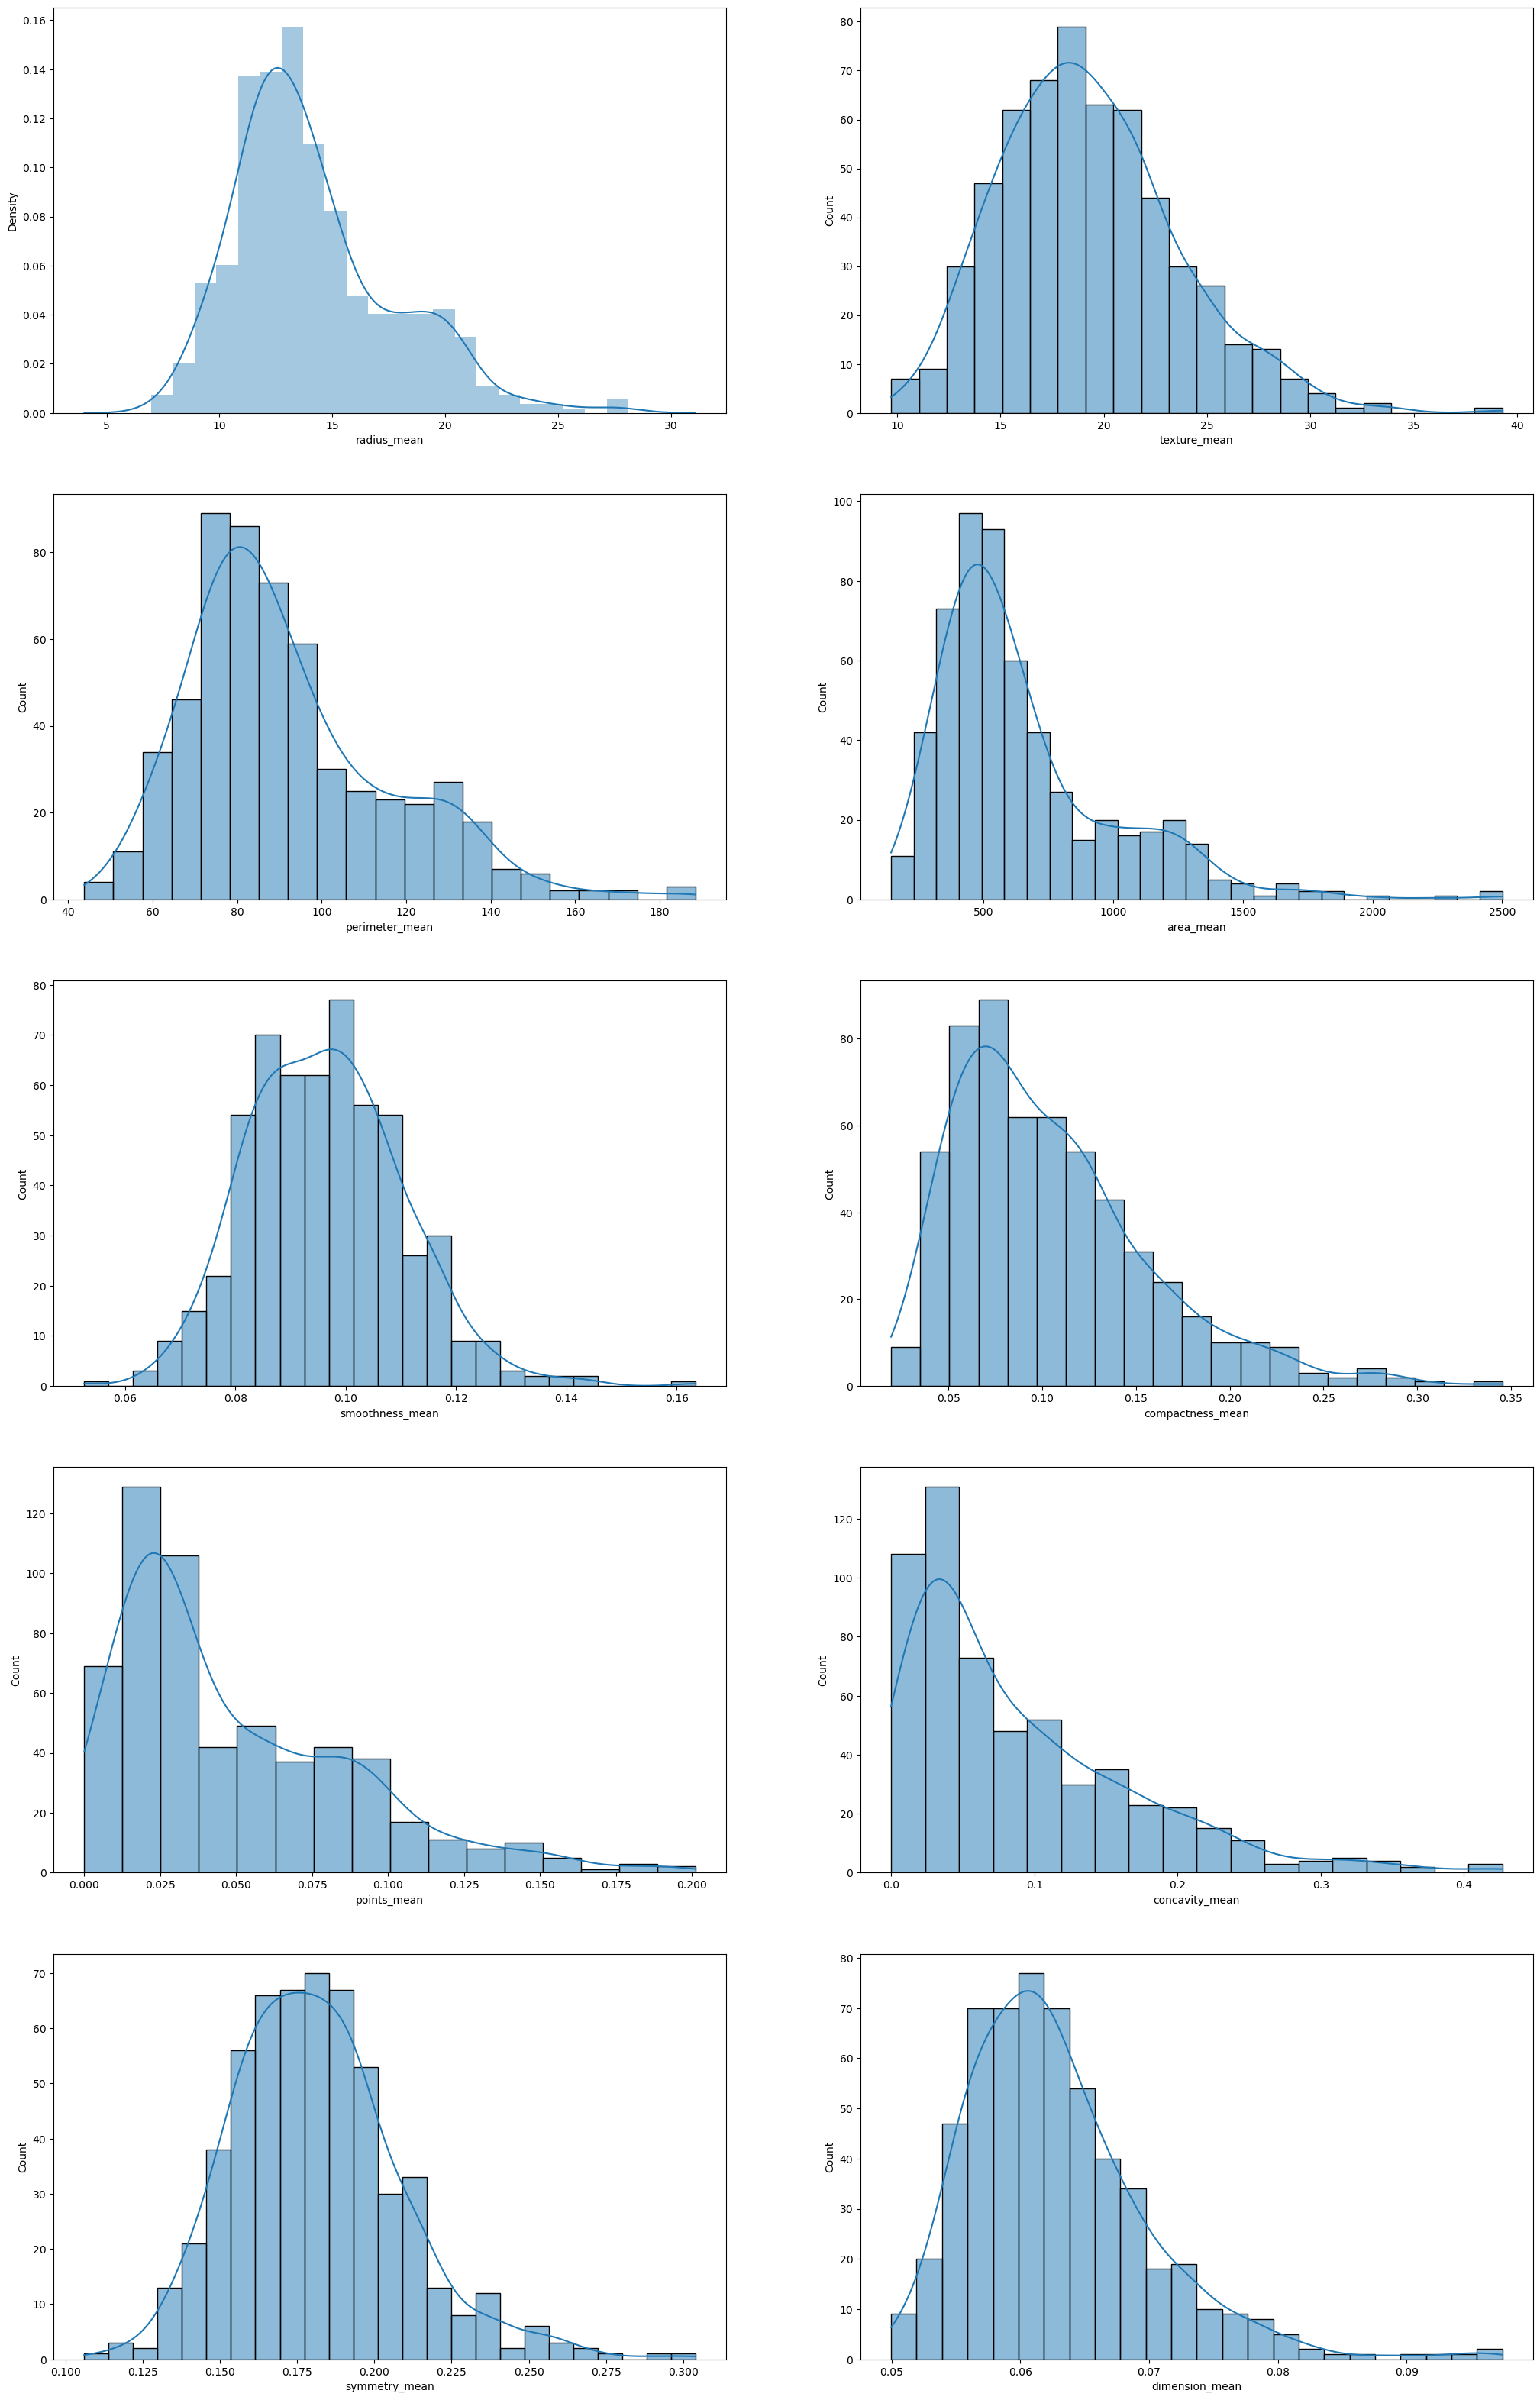

In [14]:
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.distplot(df["radius_mean"])

plt.subplot(5,2,2)
sns.histplot(df['texture_mean'], kde=True)

plt.subplot(5,2,3)
sns.histplot(df['perimeter_mean'], kde=True)

plt.subplot(5,2,4)
sns.histplot(df['area_mean'], kde=True)

plt.subplot(5,2,5)
sns.histplot(df['smoothness_mean'], kde=True)

plt.subplot(5,2,6)
sns.histplot(df['compactness_mean'], kde=True)

plt.subplot(5,2,7)
sns.histplot(df['points_mean'], kde=True)

plt.subplot(5,2,8)
sns.histplot(df['concavity_mean'], kde=True)

plt.subplot(5,2,9)
sns.histplot(df['symmetry_mean'], kde=True)

plt.subplot(5,2,10)
sns.histplot(df['dimension_mean'], kde=True)

plt.show()

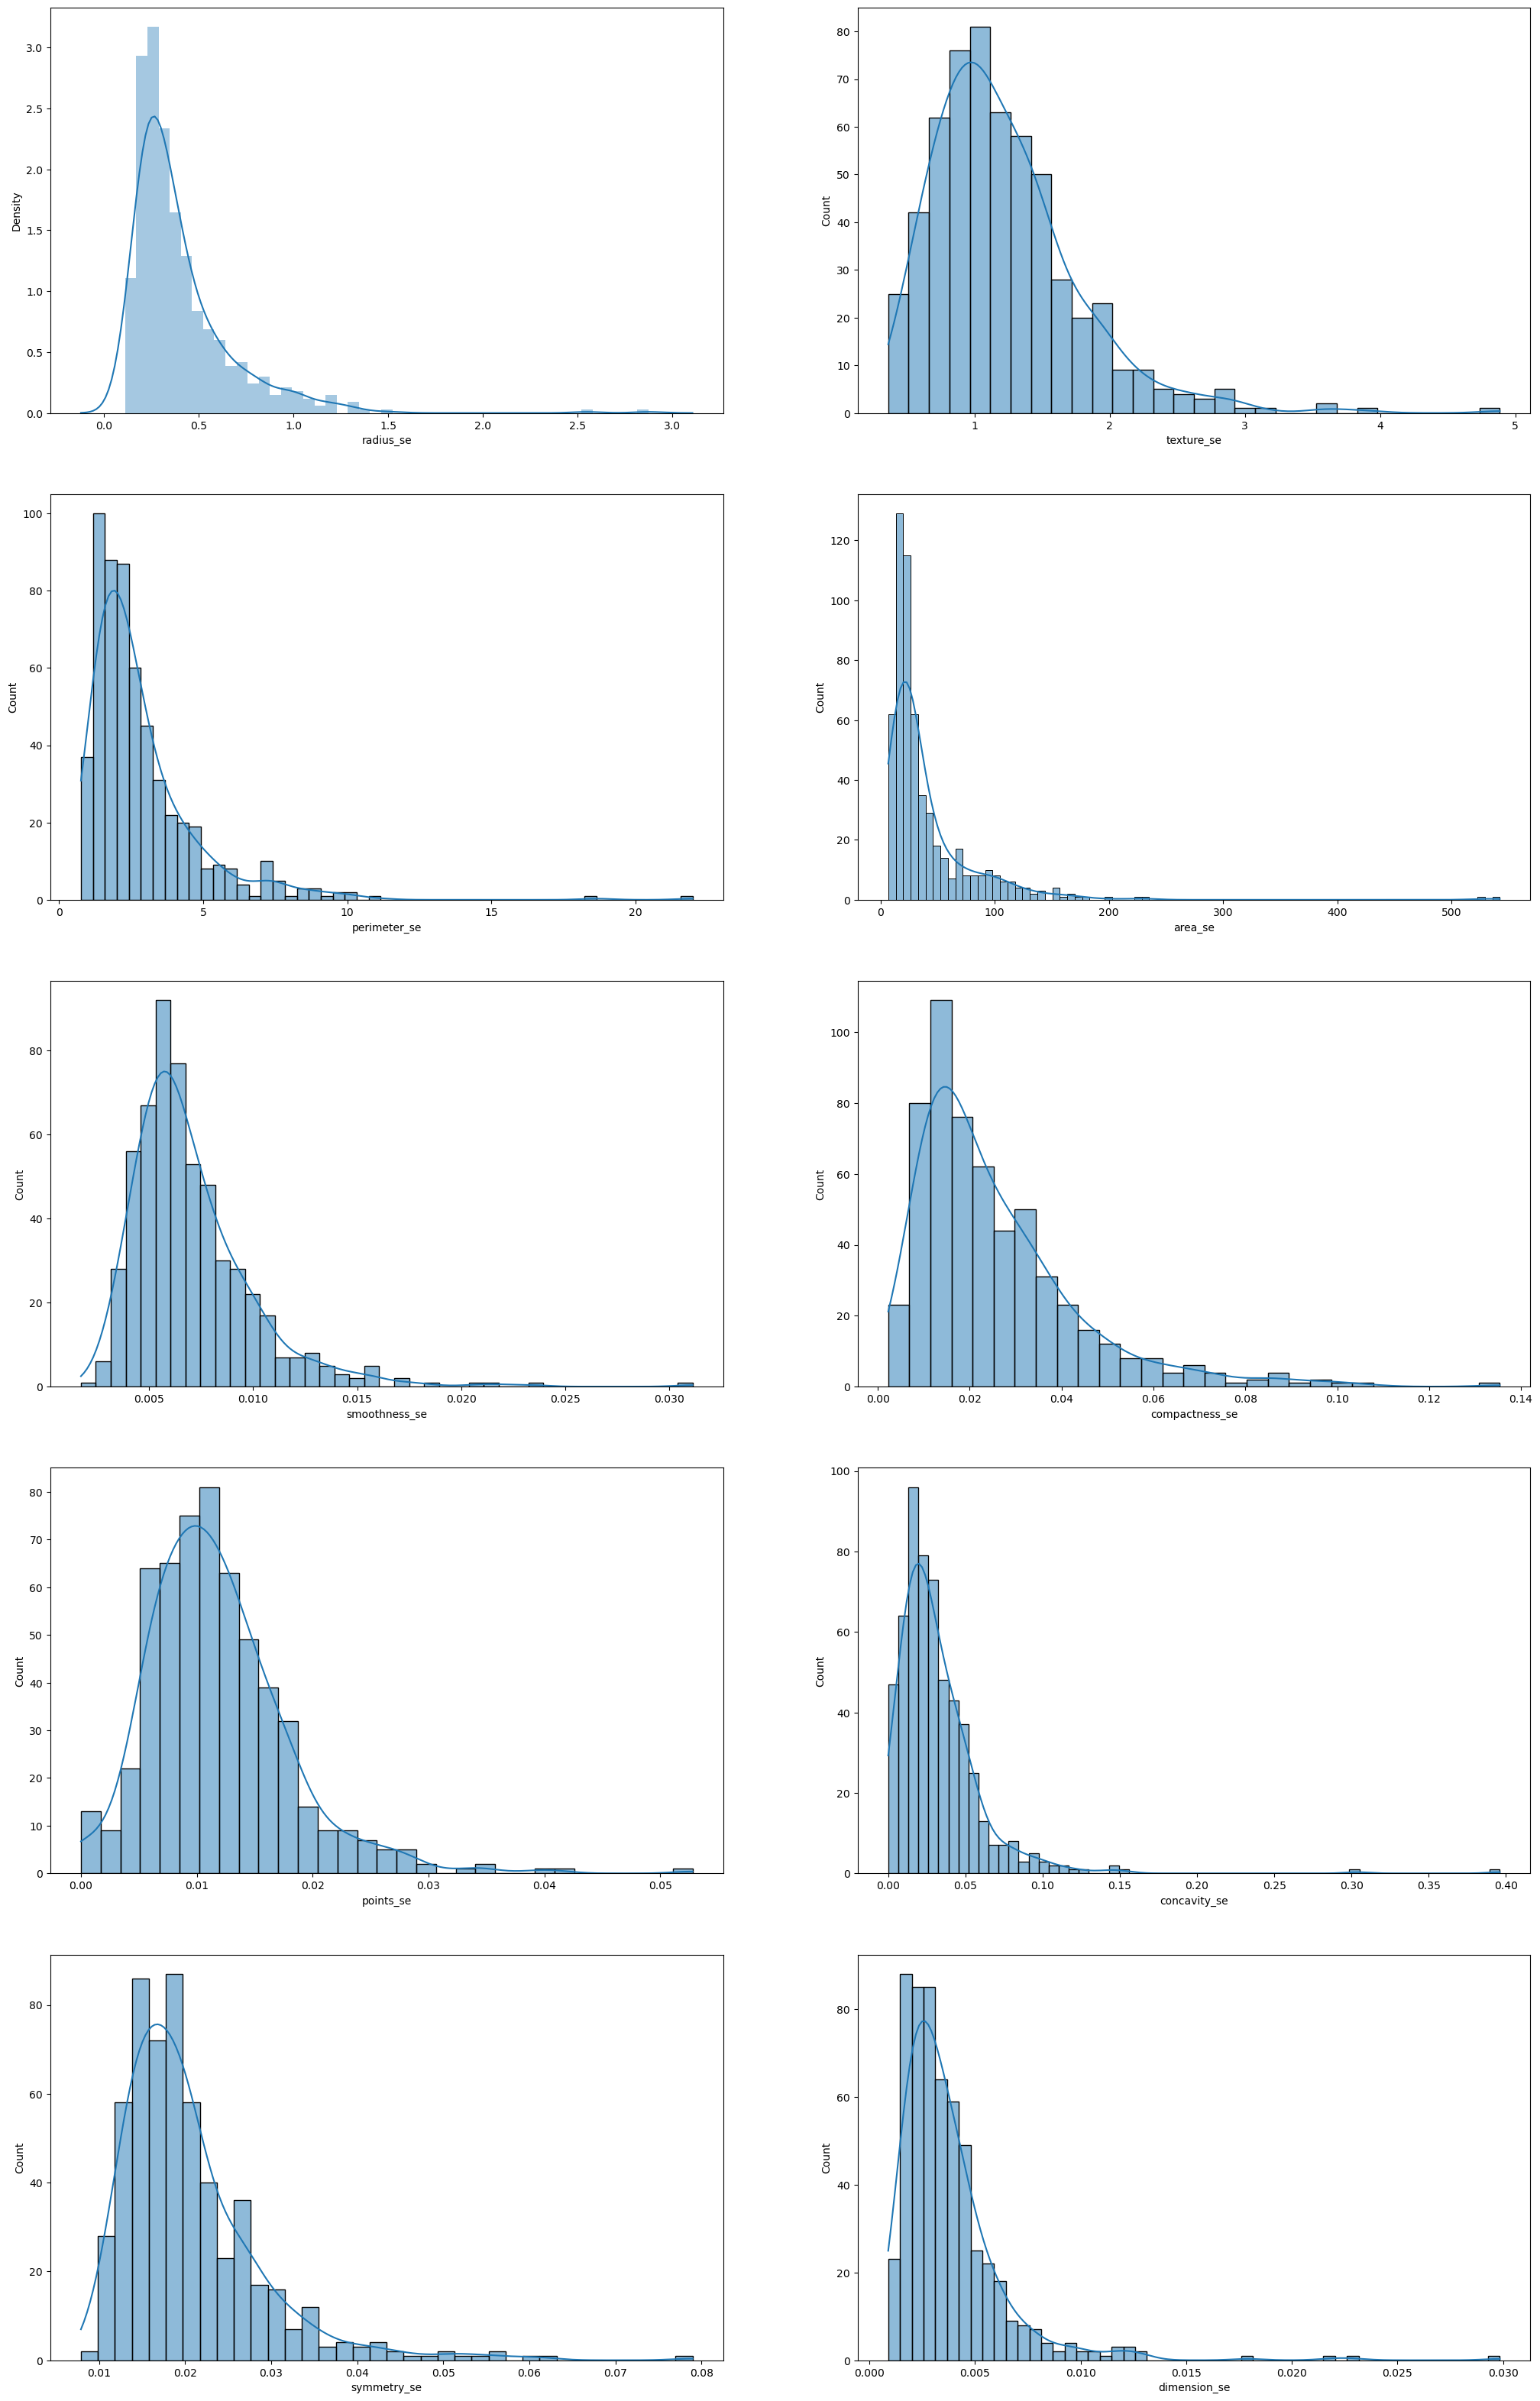

In [15]:
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.distplot(df["radius_se"])

plt.subplot(5,2,2)
sns.histplot(df['texture_se'], kde=True)

plt.subplot(5,2,3)
sns.histplot(df['perimeter_se'], kde=True)

plt.subplot(5,2,4)
sns.histplot(df['area_se'], kde=True)

plt.subplot(5,2,5)
sns.histplot(df['smoothness_se'], kde=True)

plt.subplot(5,2,6)
sns.histplot(df['compactness_se'], kde=True)

plt.subplot(5,2,7)
sns.histplot(df['points_se'], kde=True)

plt.subplot(5,2,8)
sns.histplot(df['concavity_se'], kde=True)

plt.subplot(5,2,9)
sns.histplot(df['symmetry_se'], kde=True)

plt.subplot(5,2,10)
sns.histplot(df['dimension_se'], kde=True)

plt.show()

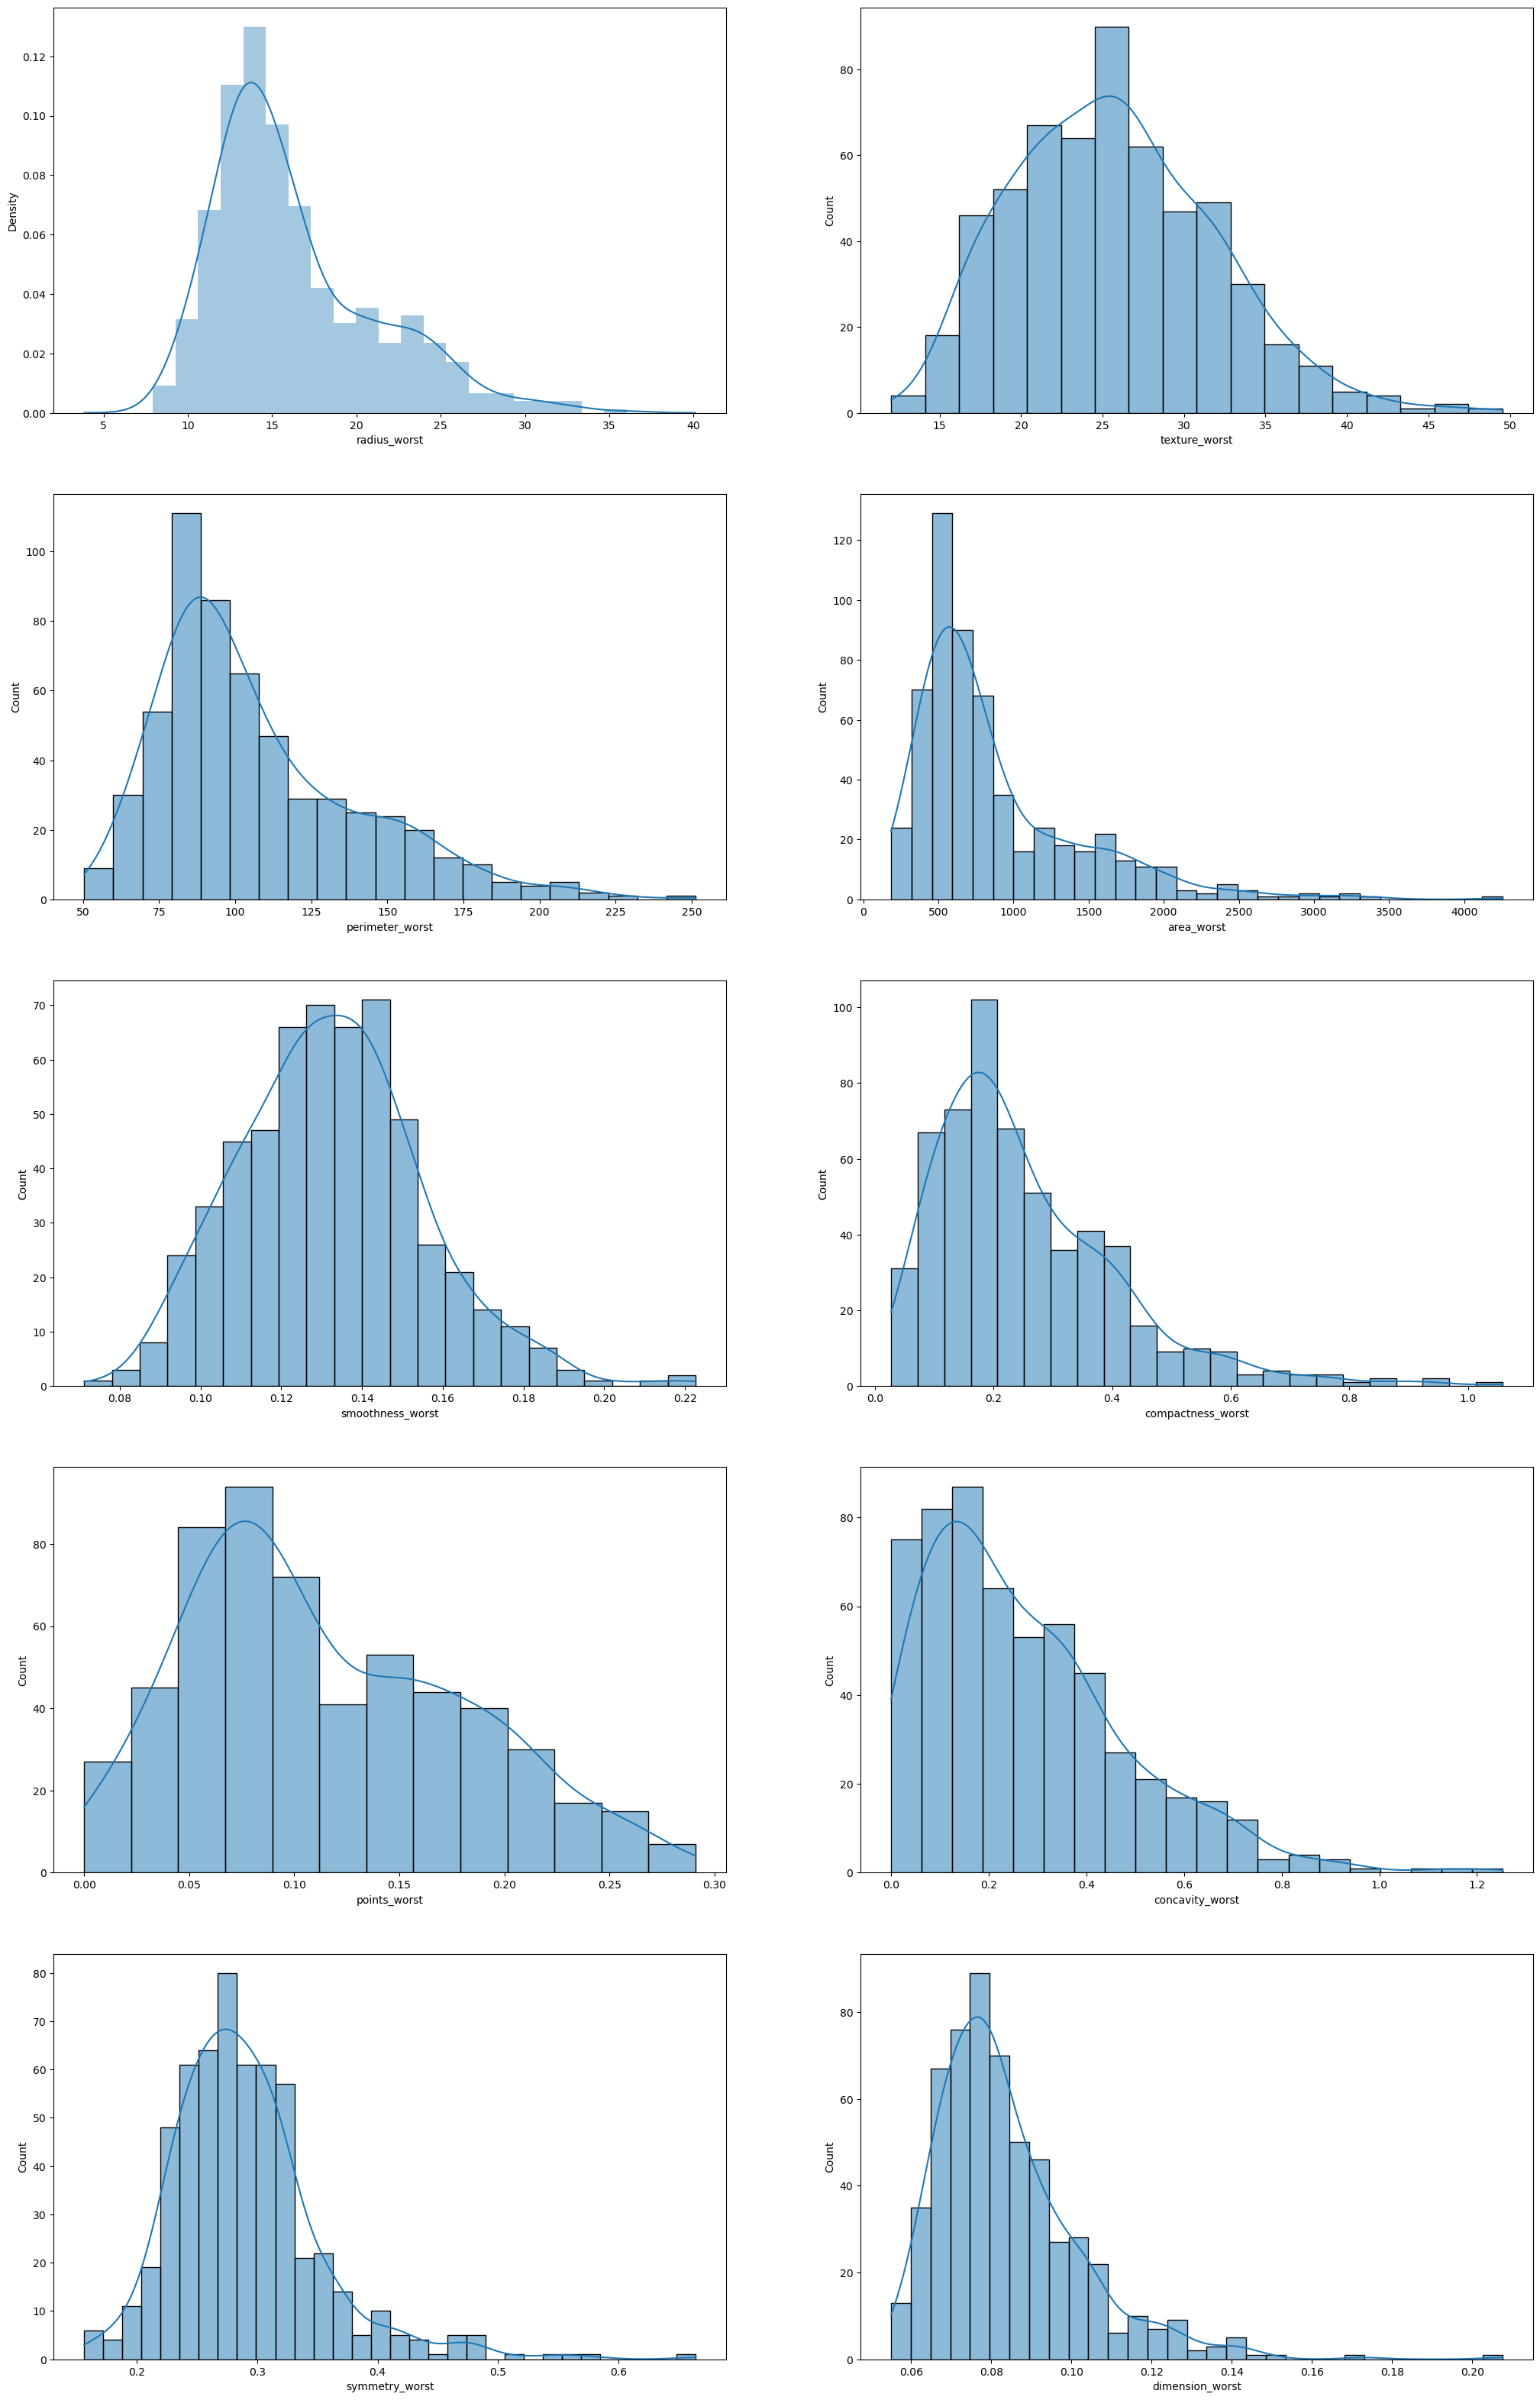

In [16]:
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.distplot(df["radius_worst"])

plt.subplot(5,2,2)
sns.histplot(df['texture_worst'], kde=True)

plt.subplot(5,2,3)
sns.histplot(df['perimeter_worst'], kde=True)

plt.subplot(5,2,4)
sns.histplot(df['area_worst'], kde=True)

plt.subplot(5,2,5)
sns.histplot(df['smoothness_worst'], kde=True)

plt.subplot(5,2,6)
sns.histplot(df['compactness_worst'], kde=True)

plt.subplot(5,2,7)
sns.histplot(df['points_worst'], kde=True)

plt.subplot(5,2,8)
sns.histplot(df['concavity_worst'], kde=True)

plt.subplot(5,2,9)
sns.histplot(df['symmetry_worst'], kde=True)

plt.subplot(5,2,10)
sns.histplot(df['dimension_worst'], kde=True)

plt.show()

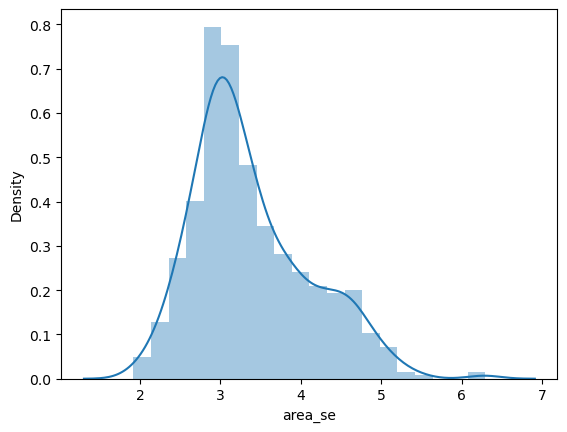

In [82]:
# Now let us transform the data and make them normally distributed
df["area_se"]=np.log(df["area_se"])
sns.distplot(df["area_se"])
plt.show()

In [83]:
df["area_se"].skew()
# before log transformation skewness=5.447186 and after transformation skewness=0.79

0.7976094380828621

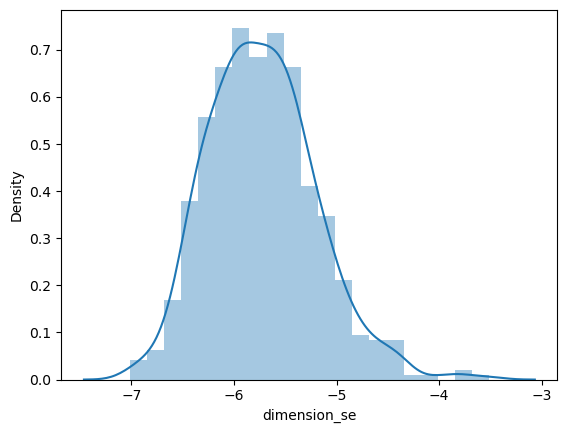

In [20]:
# for dimension_se col transformation
df["dimension_se"]=np.log(df["dimension_se"])
sns.distplot(df["dimension_se"])
plt.show()


In [21]:
df["dimension_se"].skew()
# before log transformation skewness=3.923969 and after transformation skewness=0.53

0.5300752337625797

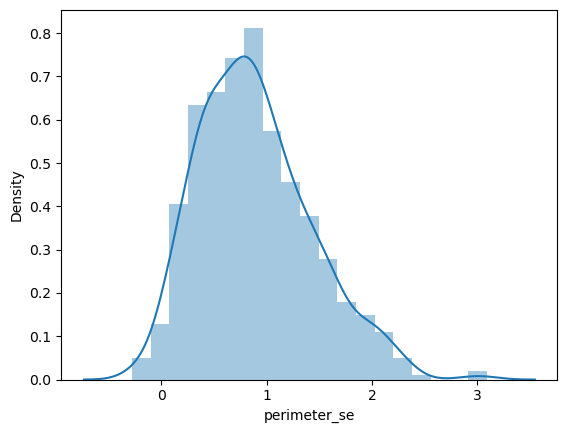

In [23]:
df["perimeter_se"]=np.log(df["perimeter_se"])
sns.distplot(df["perimeter_se"])
plt.show()

In [24]:
df["perimeter_se"].skew()
# before log transformation skewness=3.44 and after transformation skewness=0.63

0.6379430961494679

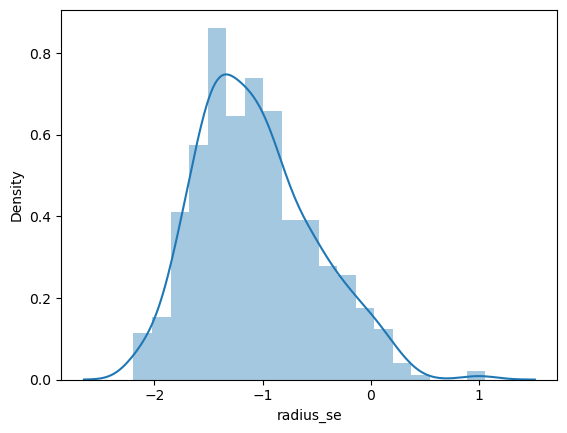

0.5729742742198553

In [40]:
df["radius_se"]=np.log(df["radius_se"])
sns.distplot(df["radius_se"])
plt.show()
df["radius_se"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

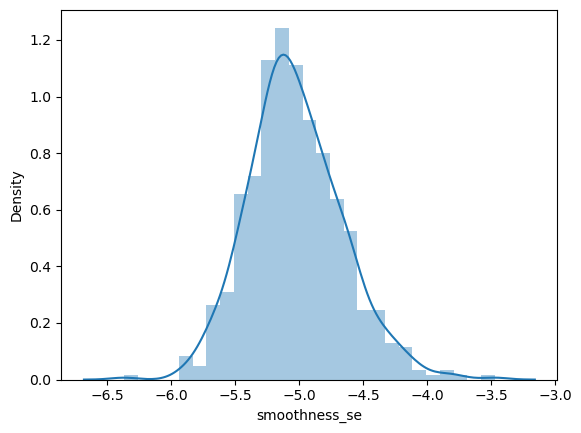

0.4043639432289207

In [85]:
df["smoothness_se"]=np.log(df["smoothness_se"])
sns.distplot(df["smoothness_se"])
plt.show()
df["smoothness_se"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

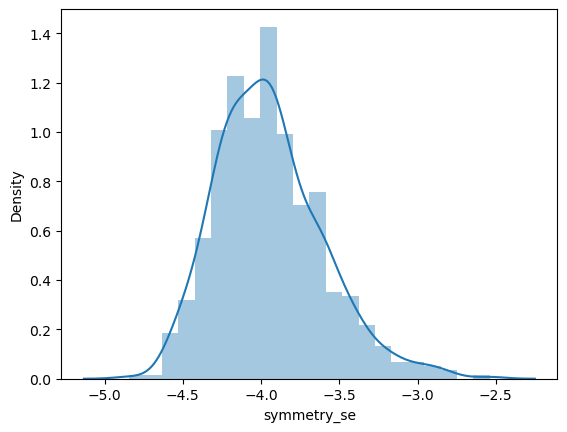

0.6894164954474239

In [86]:
df["symmetry_se"]=np.log(df["symmetry_se"])
sns.distplot(df["symmetry_se"])
plt.show()
df["symmetry_se"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

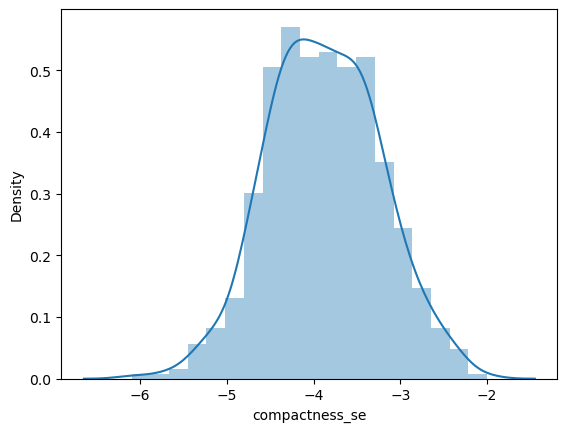

-0.0040410390104463345

In [87]:
df["compactness_se"]=np.log(df["compactness_se"])
sns.distplot(df["compactness_se"])
plt.show()
df["compactness_se"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

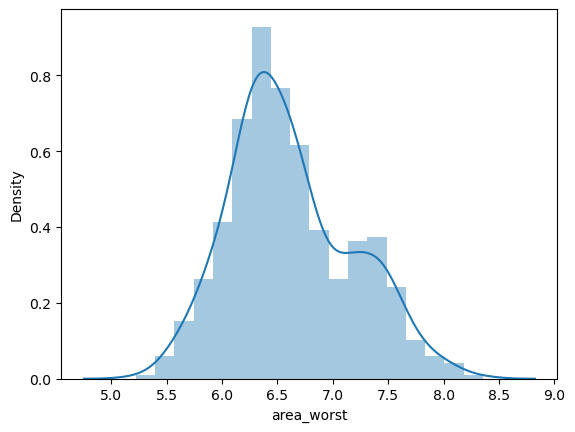

0.4559140695709111

In [88]:
df["area_worst"]=np.log(df["area_worst"])
sns.distplot(df["area_worst"])
plt.show()
df["area_worst"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

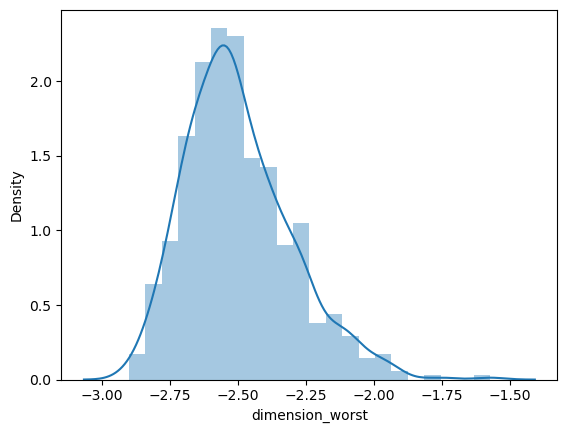

0.7993445279731244

In [89]:
df["dimension_worst"]=np.log(df["dimension_worst"])
sns.distplot(df["dimension_worst"])
plt.show()
df["dimension_worst"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

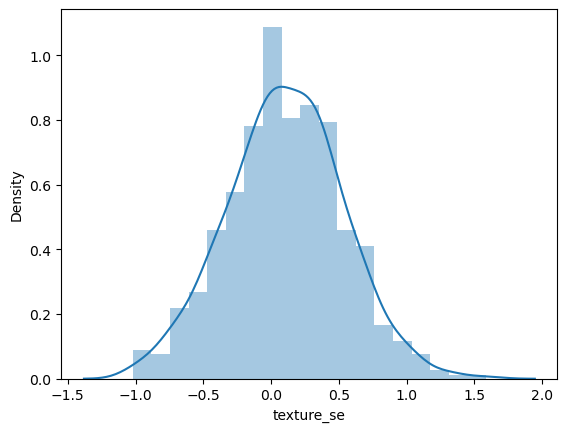

0.0291905333277468

In [17]:
df["texture_se"]=np.log(df["texture_se"])
sns.distplot(df["texture_se"])
plt.show()
df["texture_se"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

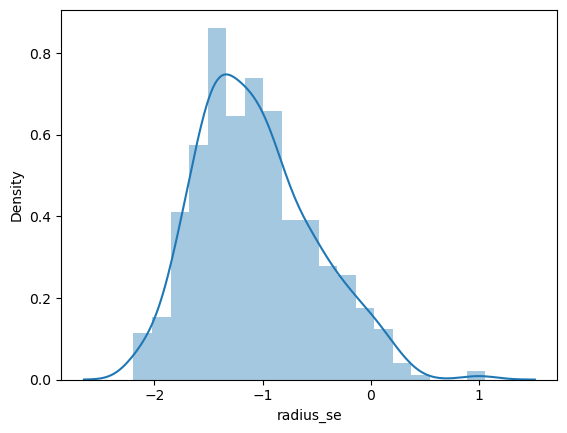

0.5729742742198553

In [18]:
df["radius_se"]=np.log(df["radius_se"])
sns.distplot(df["radius_se"])
plt.show()
df["radius_se"].skew()
# before log transformation skewness=3.08 and after transformation skewness=0.57

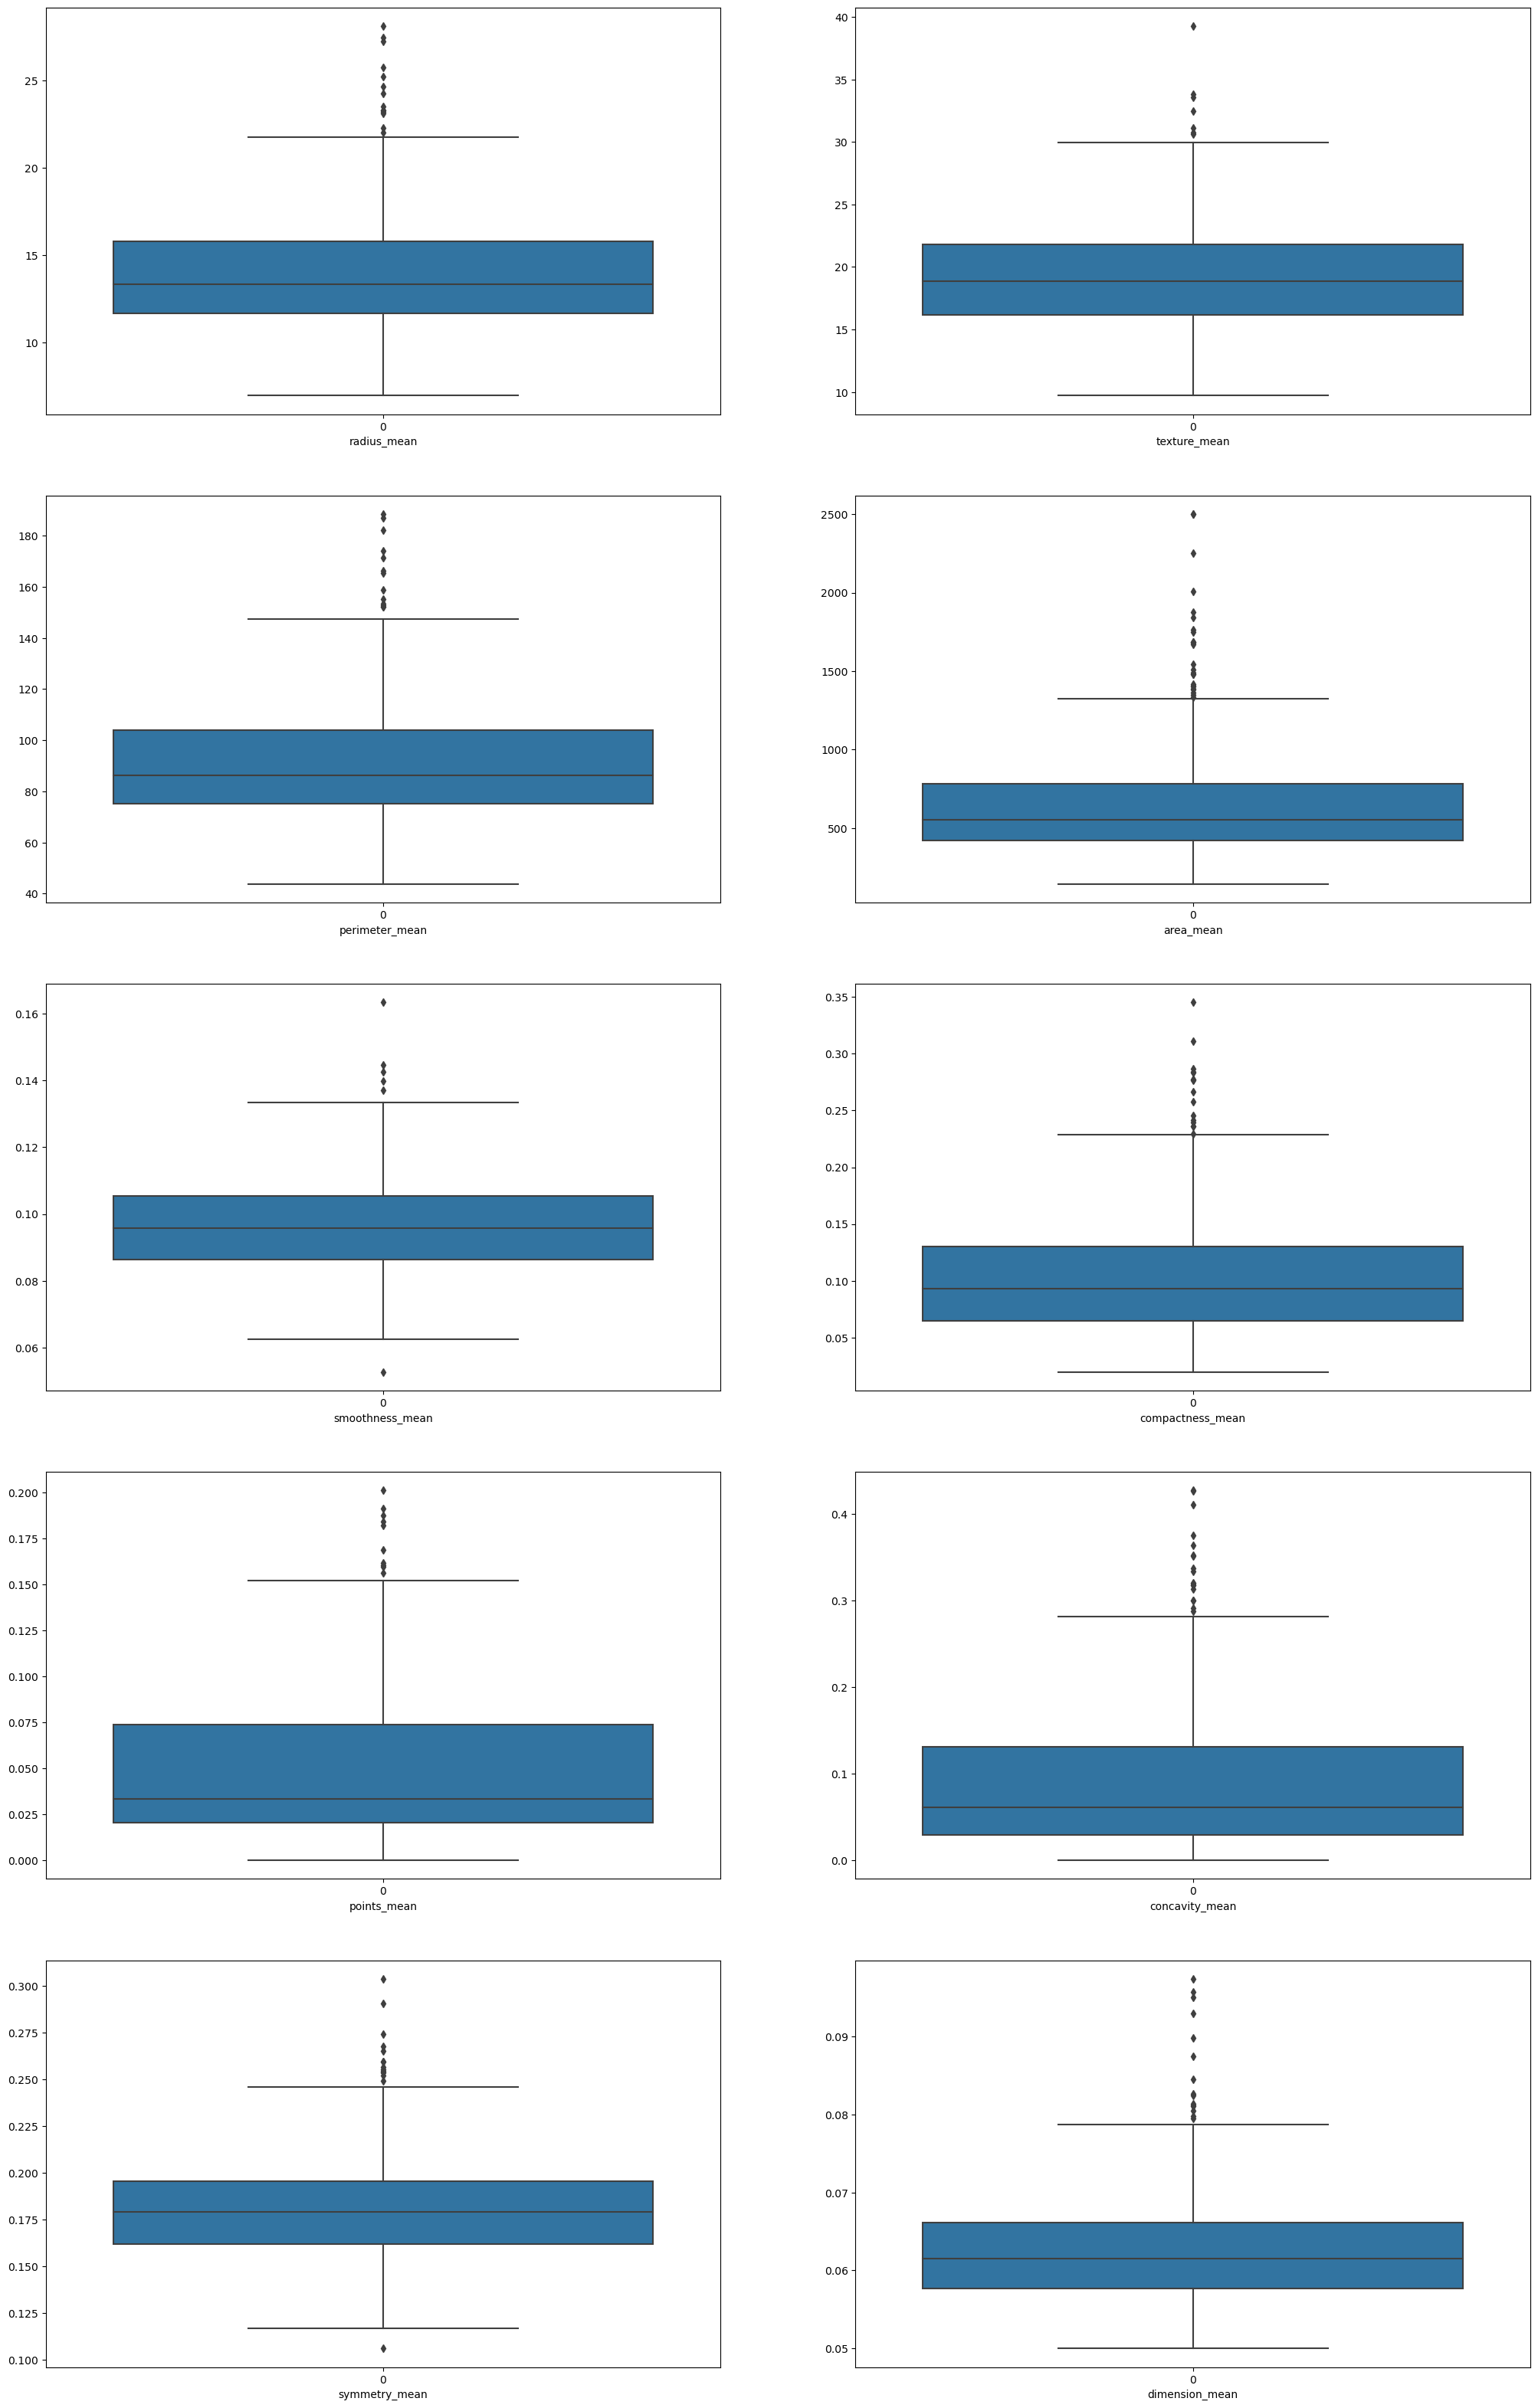

In [23]:
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.boxplot(df["radius_mean"])
plt.xlabel("radius_mean")

plt.subplot(5,2,2)
sns.boxplot(df['texture_mean'])
plt.xlabel("texture_mean")

plt.subplot(5,2,3)
sns.boxplot(df['perimeter_mean'])
plt.xlabel("perimeter_mean")

plt.subplot(5,2,4)
sns.boxplot(df['area_mean'])
plt.xlabel("area_mean")

plt.subplot(5,2,5)
sns.boxplot(df['smoothness_mean'])
plt.xlabel("smoothness_mean")

plt.subplot(5,2,6)
sns.boxplot(df['compactness_mean'])
plt.xlabel("compactness_mean")

plt.subplot(5,2,7)
sns.boxplot(df['points_mean'])
plt.xlabel("points_mean")

plt.subplot(5,2,8)
sns.boxplot(df['concavity_mean'])
plt.xlabel("concavity_mean")

plt.subplot(5,2,9)
sns.boxplot(df['symmetry_mean'])
plt.xlabel("symmetry_mean")

plt.subplot(5,2,10)
sns.boxplot(df['dimension_mean'])
plt.xlabel("dimension_mean")

plt.show()

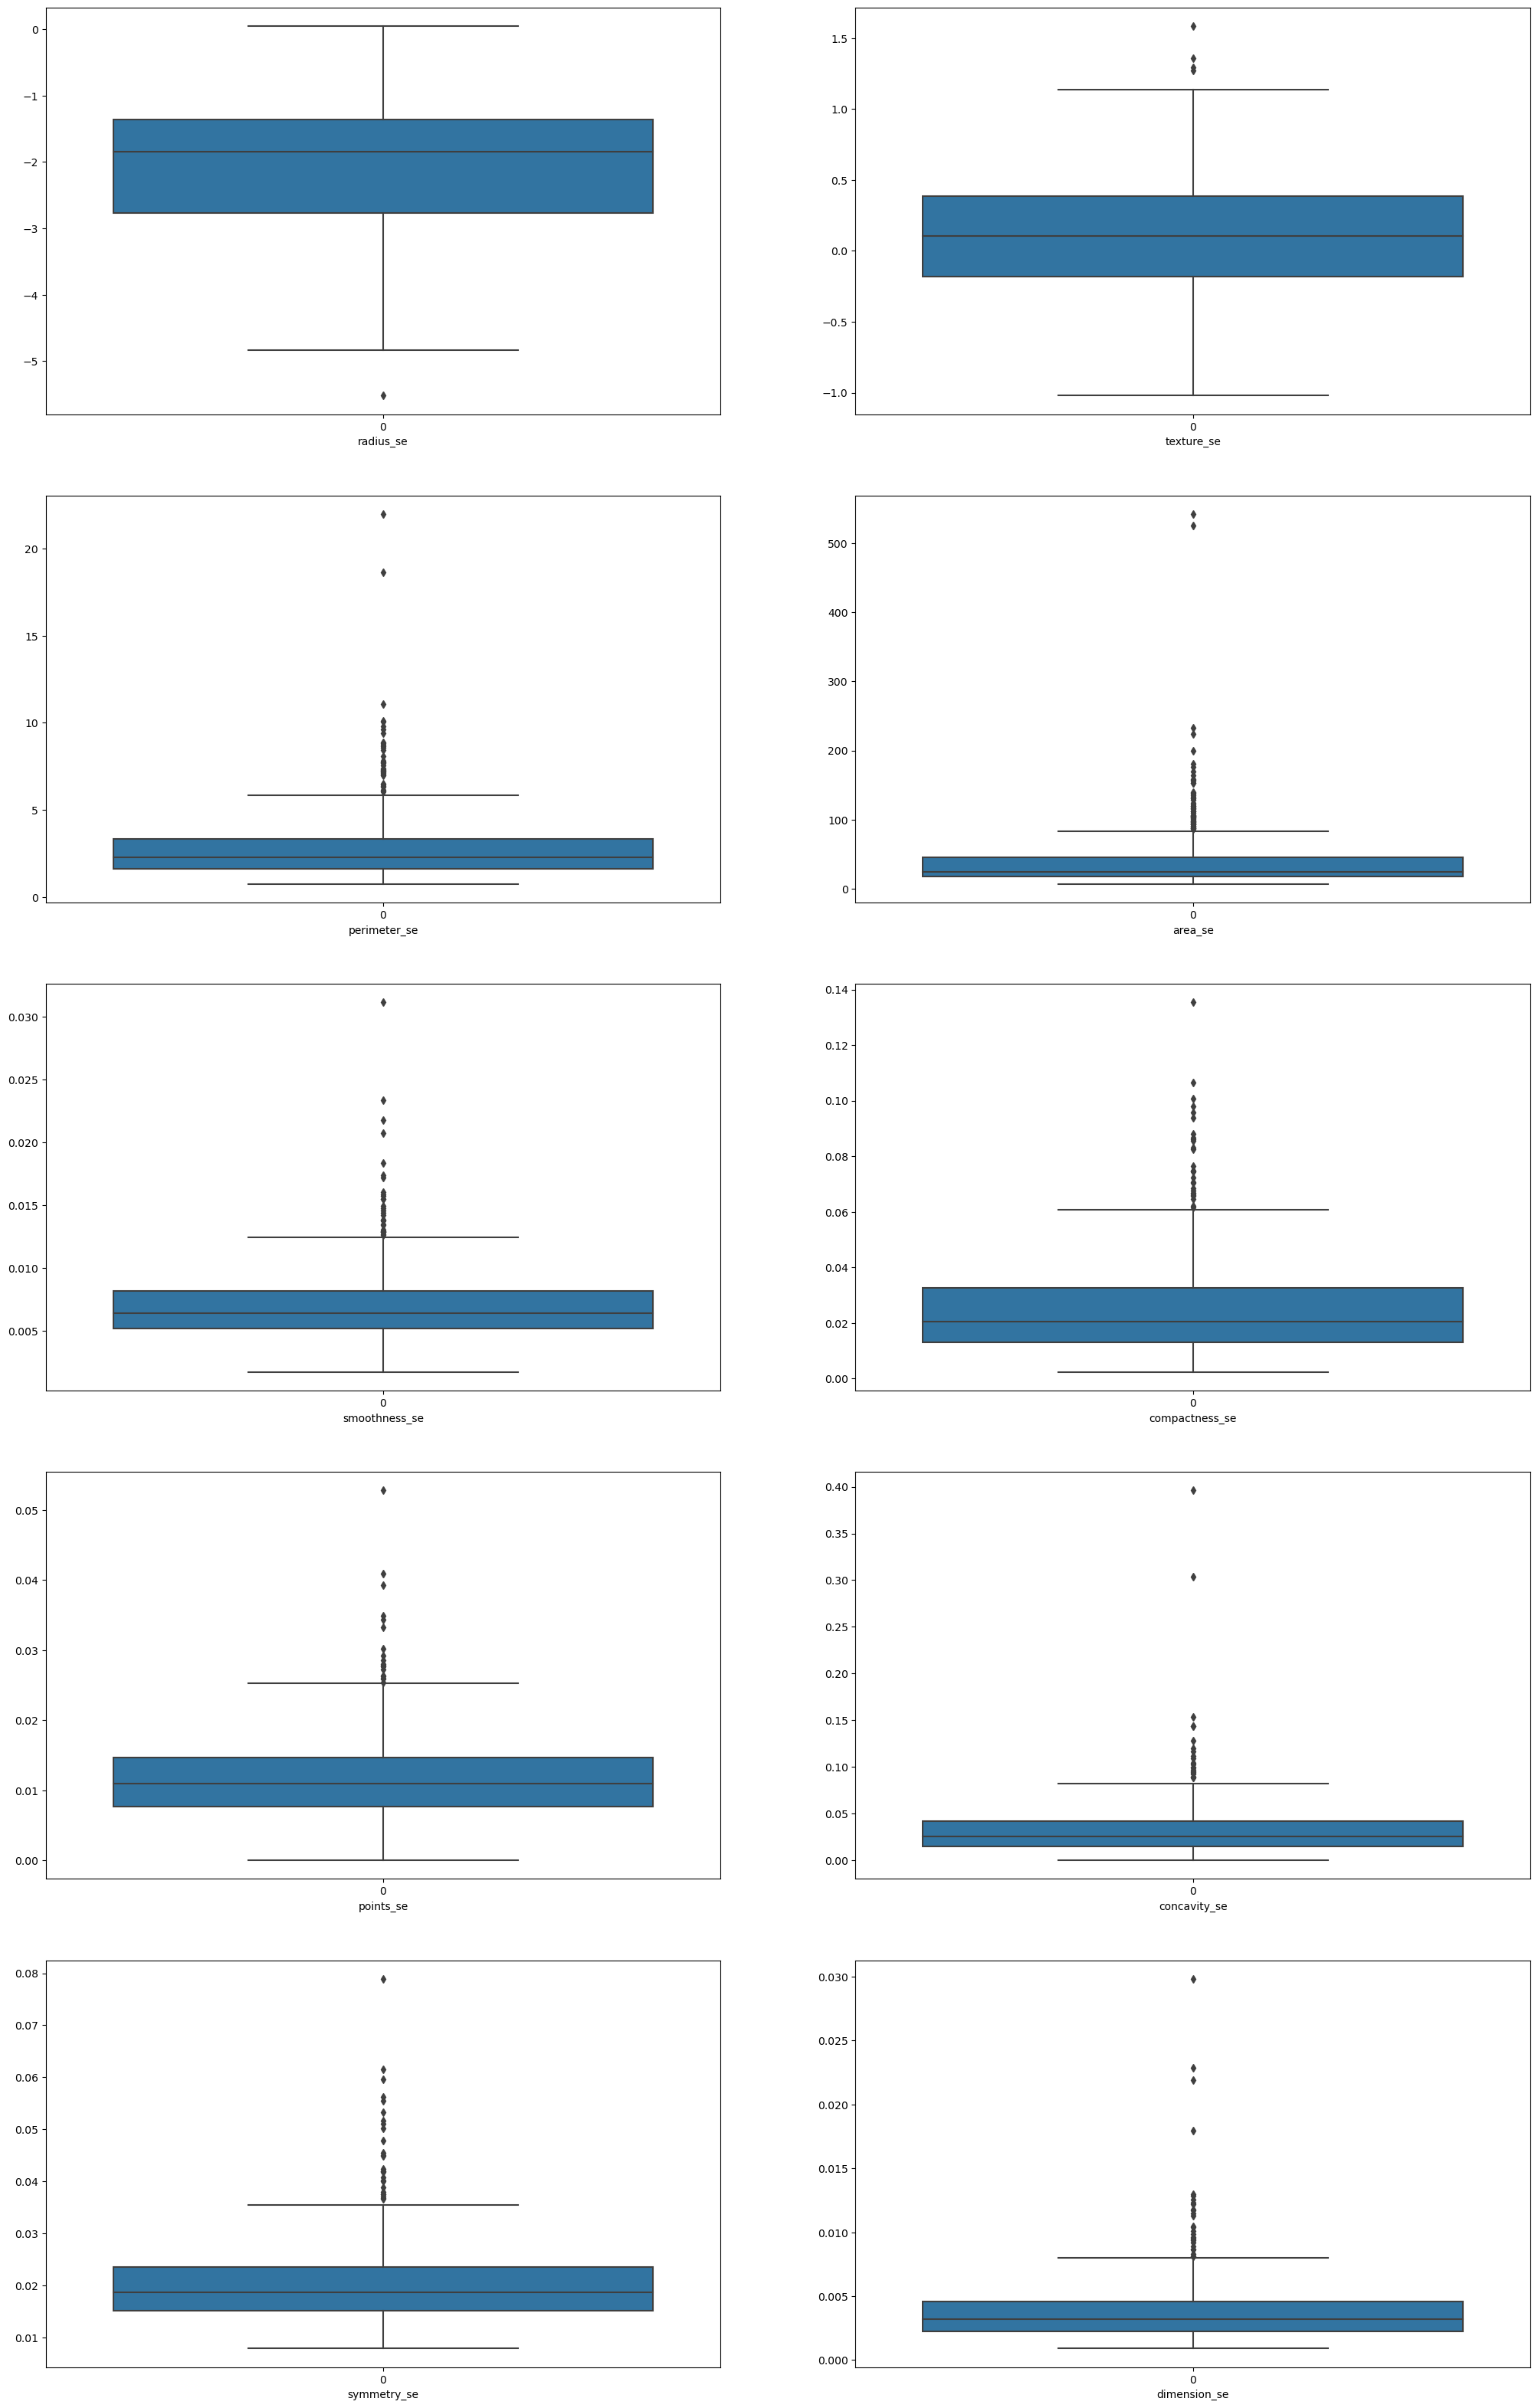

In [24]:
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.boxplot(df["radius_se"])
plt.xlabel("radius_se")

plt.subplot(5,2,2)
sns.boxplot(df['texture_se'])
plt.xlabel("texture_se")

plt.subplot(5,2,3)
sns.boxplot(df['perimeter_se'])
plt.xlabel("perimeter_se")

plt.subplot(5,2,4)
sns.boxplot(df['area_se'])
plt.xlabel("area_se")

plt.subplot(5,2,5)
sns.boxplot(df['smoothness_se'])
plt.xlabel("smoothness_se")

plt.subplot(5,2,6)
sns.boxplot(df['compactness_se'])
plt.xlabel("compactness_se")

plt.subplot(5,2,7)
sns.boxplot(df['points_se'])
plt.xlabel("points_se")

plt.subplot(5,2,8)
sns.boxplot(df['concavity_se'])
plt.xlabel("concavity_se")

plt.subplot(5,2,9)
sns.boxplot(df['symmetry_se'])
plt.xlabel("symmetry_se")

plt.subplot(5,2,10)
sns.boxplot(df['dimension_se'])
plt.xlabel("dimension_se")

plt.show()

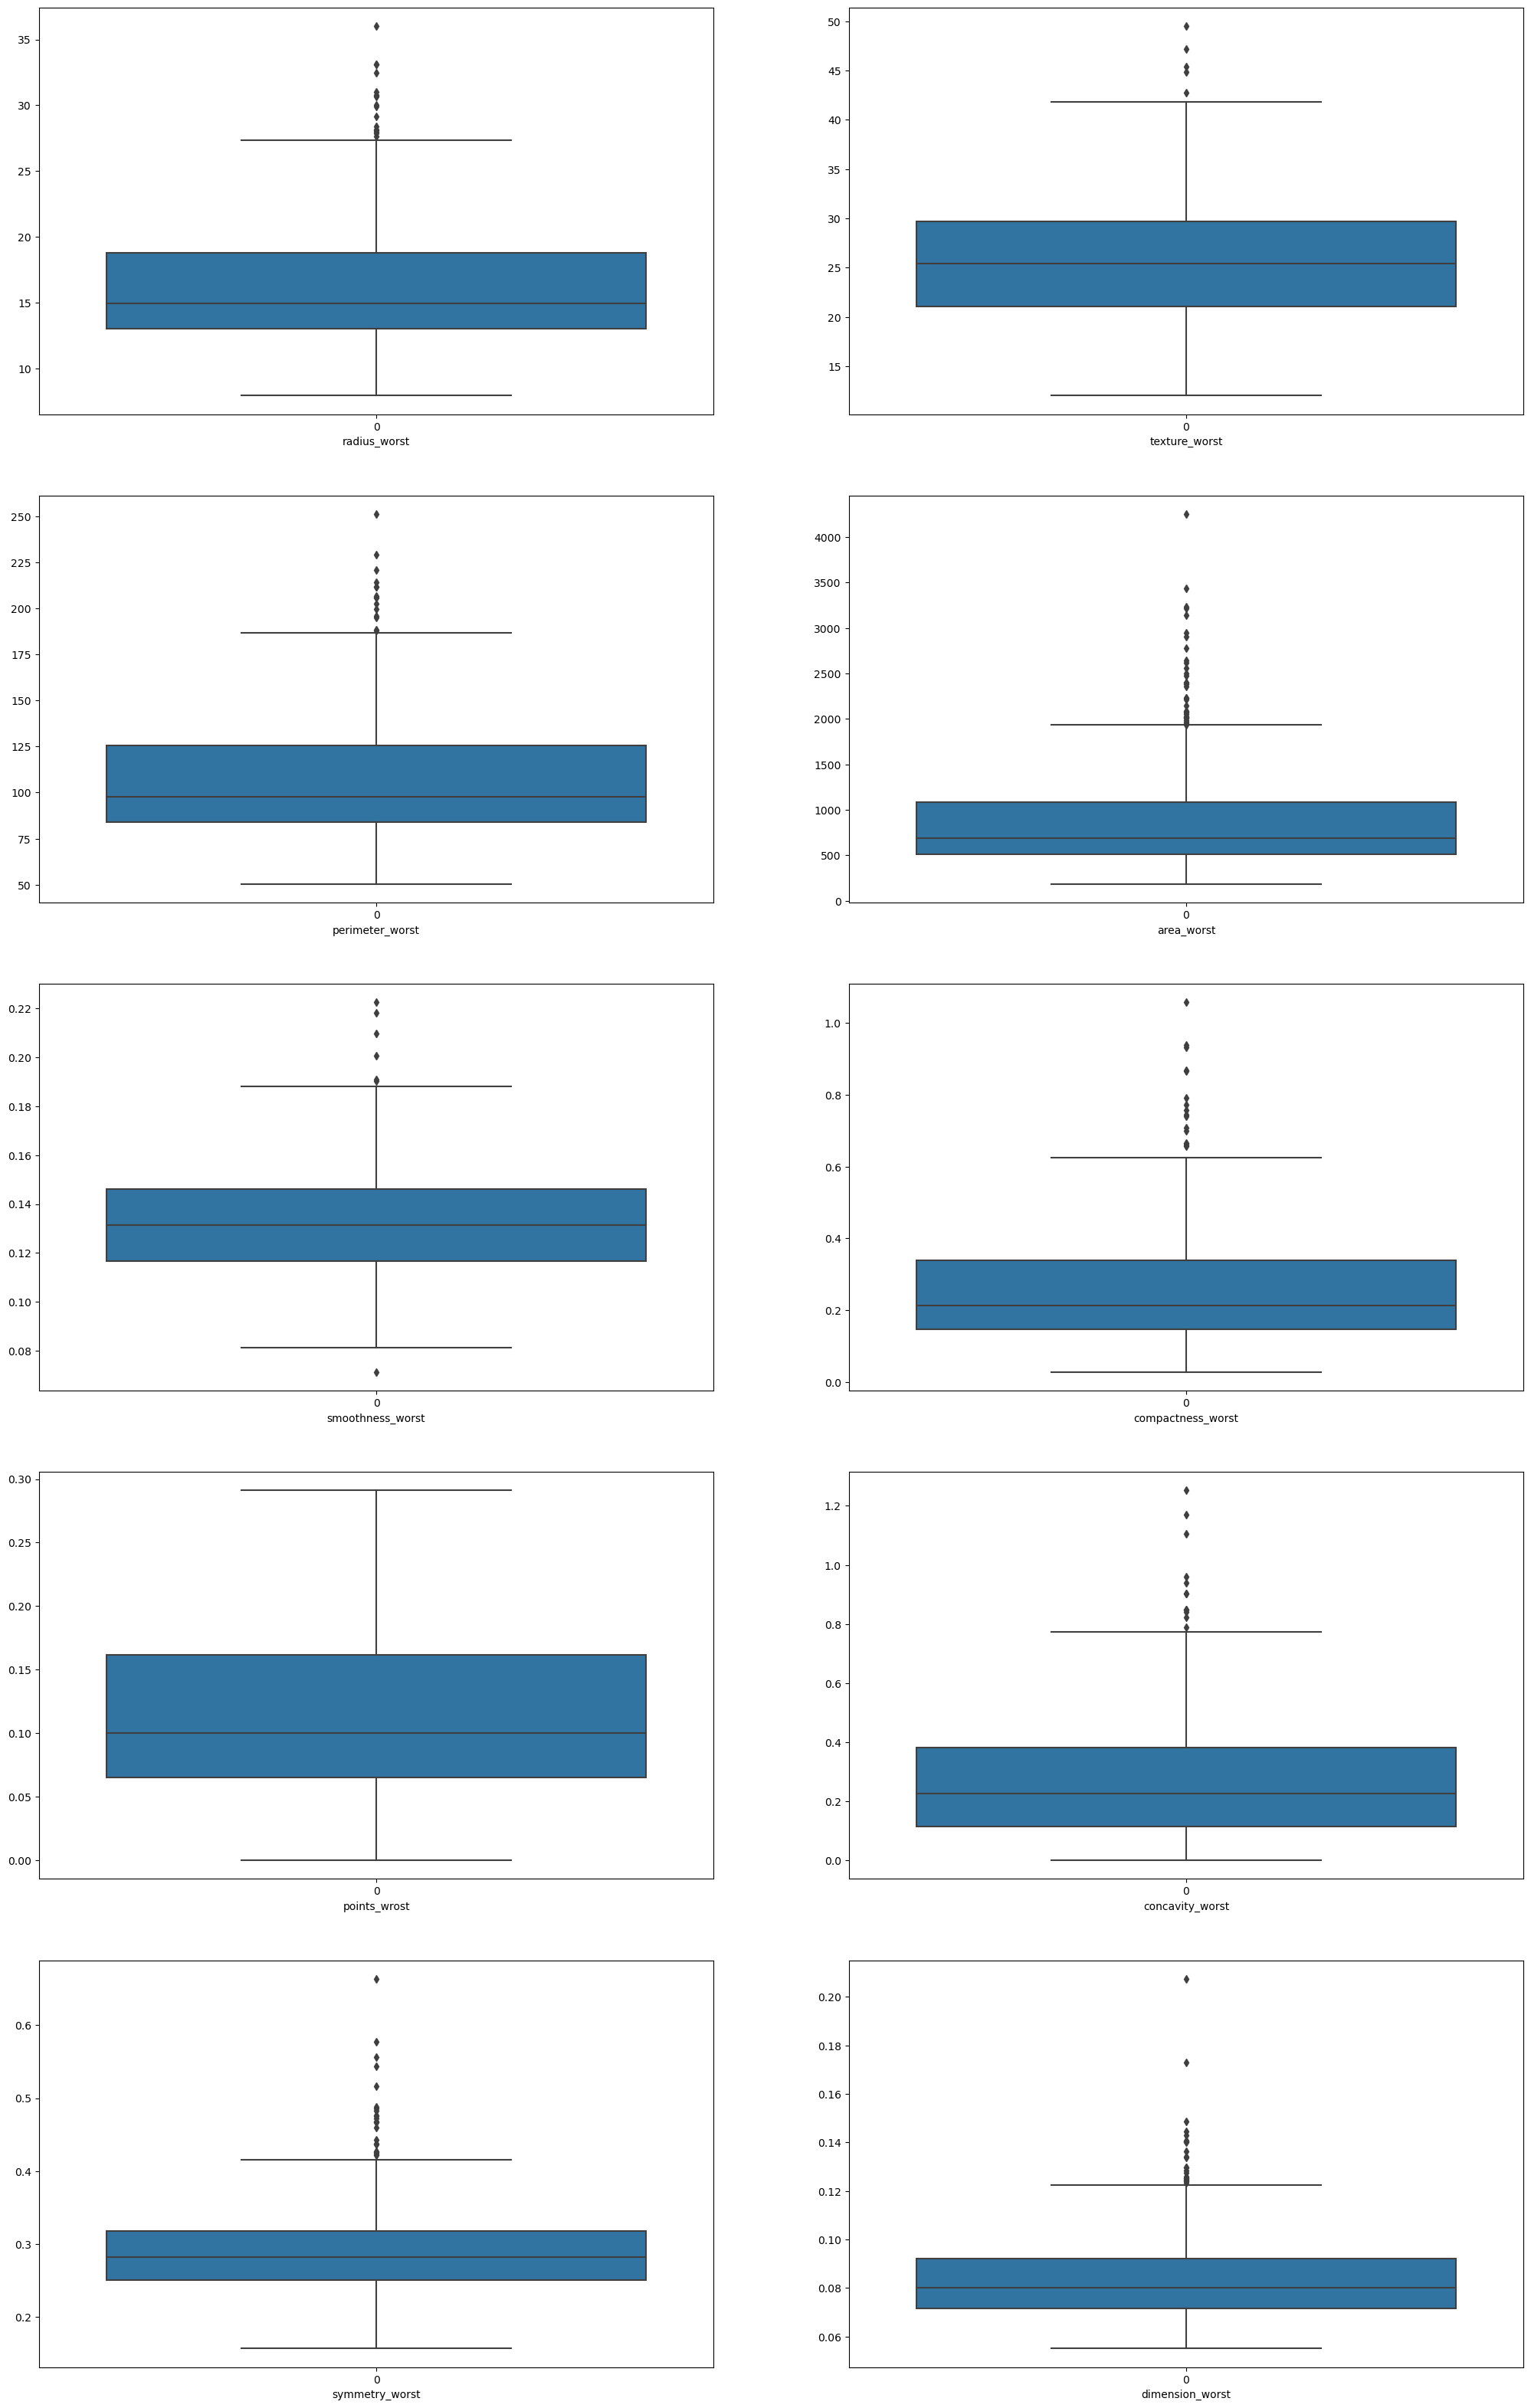

In [25]:
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.boxplot(df["radius_worst"])
plt.xlabel("radius_worst")

plt.subplot(5,2,2)
sns.boxplot(df['texture_worst'])
plt.xlabel("texture_worst")

plt.subplot(5,2,3)
sns.boxplot(df['perimeter_worst'])
plt.xlabel("perimeter_worst")

plt.subplot(5,2,4)
sns.boxplot(df['area_worst'])
plt.xlabel("area_worst")

plt.subplot(5,2,5)
sns.boxplot(df['smoothness_worst'])
plt.xlabel("smoothness_worst")

plt.subplot(5,2,6)
sns.boxplot(df['compactness_worst'])
plt.xlabel("compactness_worst")

plt.subplot(5,2,7)
sns.boxplot(df['points_worst'])
plt.xlabel("points_wrost")

plt.subplot(5,2,8)
sns.boxplot(df['concavity_worst'])
plt.xlabel("concavity_worst")

plt.subplot(5,2,9)
sns.boxplot(df['symmetry_worst'])
plt.xlabel("symmetry_worst")

plt.subplot(5,2,10)
sns.boxplot(df['dimension_worst'])
plt.xlabel("dimension_worst")

plt.show()

In [50]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'dimension_worst']

In [51]:
df["radius_se"].fillna(df["radius_se"].mean(),inplace=True)

In [52]:
df.isnull().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [47]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [53]:
for i in col:
    winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=[i],tail="both")
    df[i]=winsor.fit_transform(df[[i]])

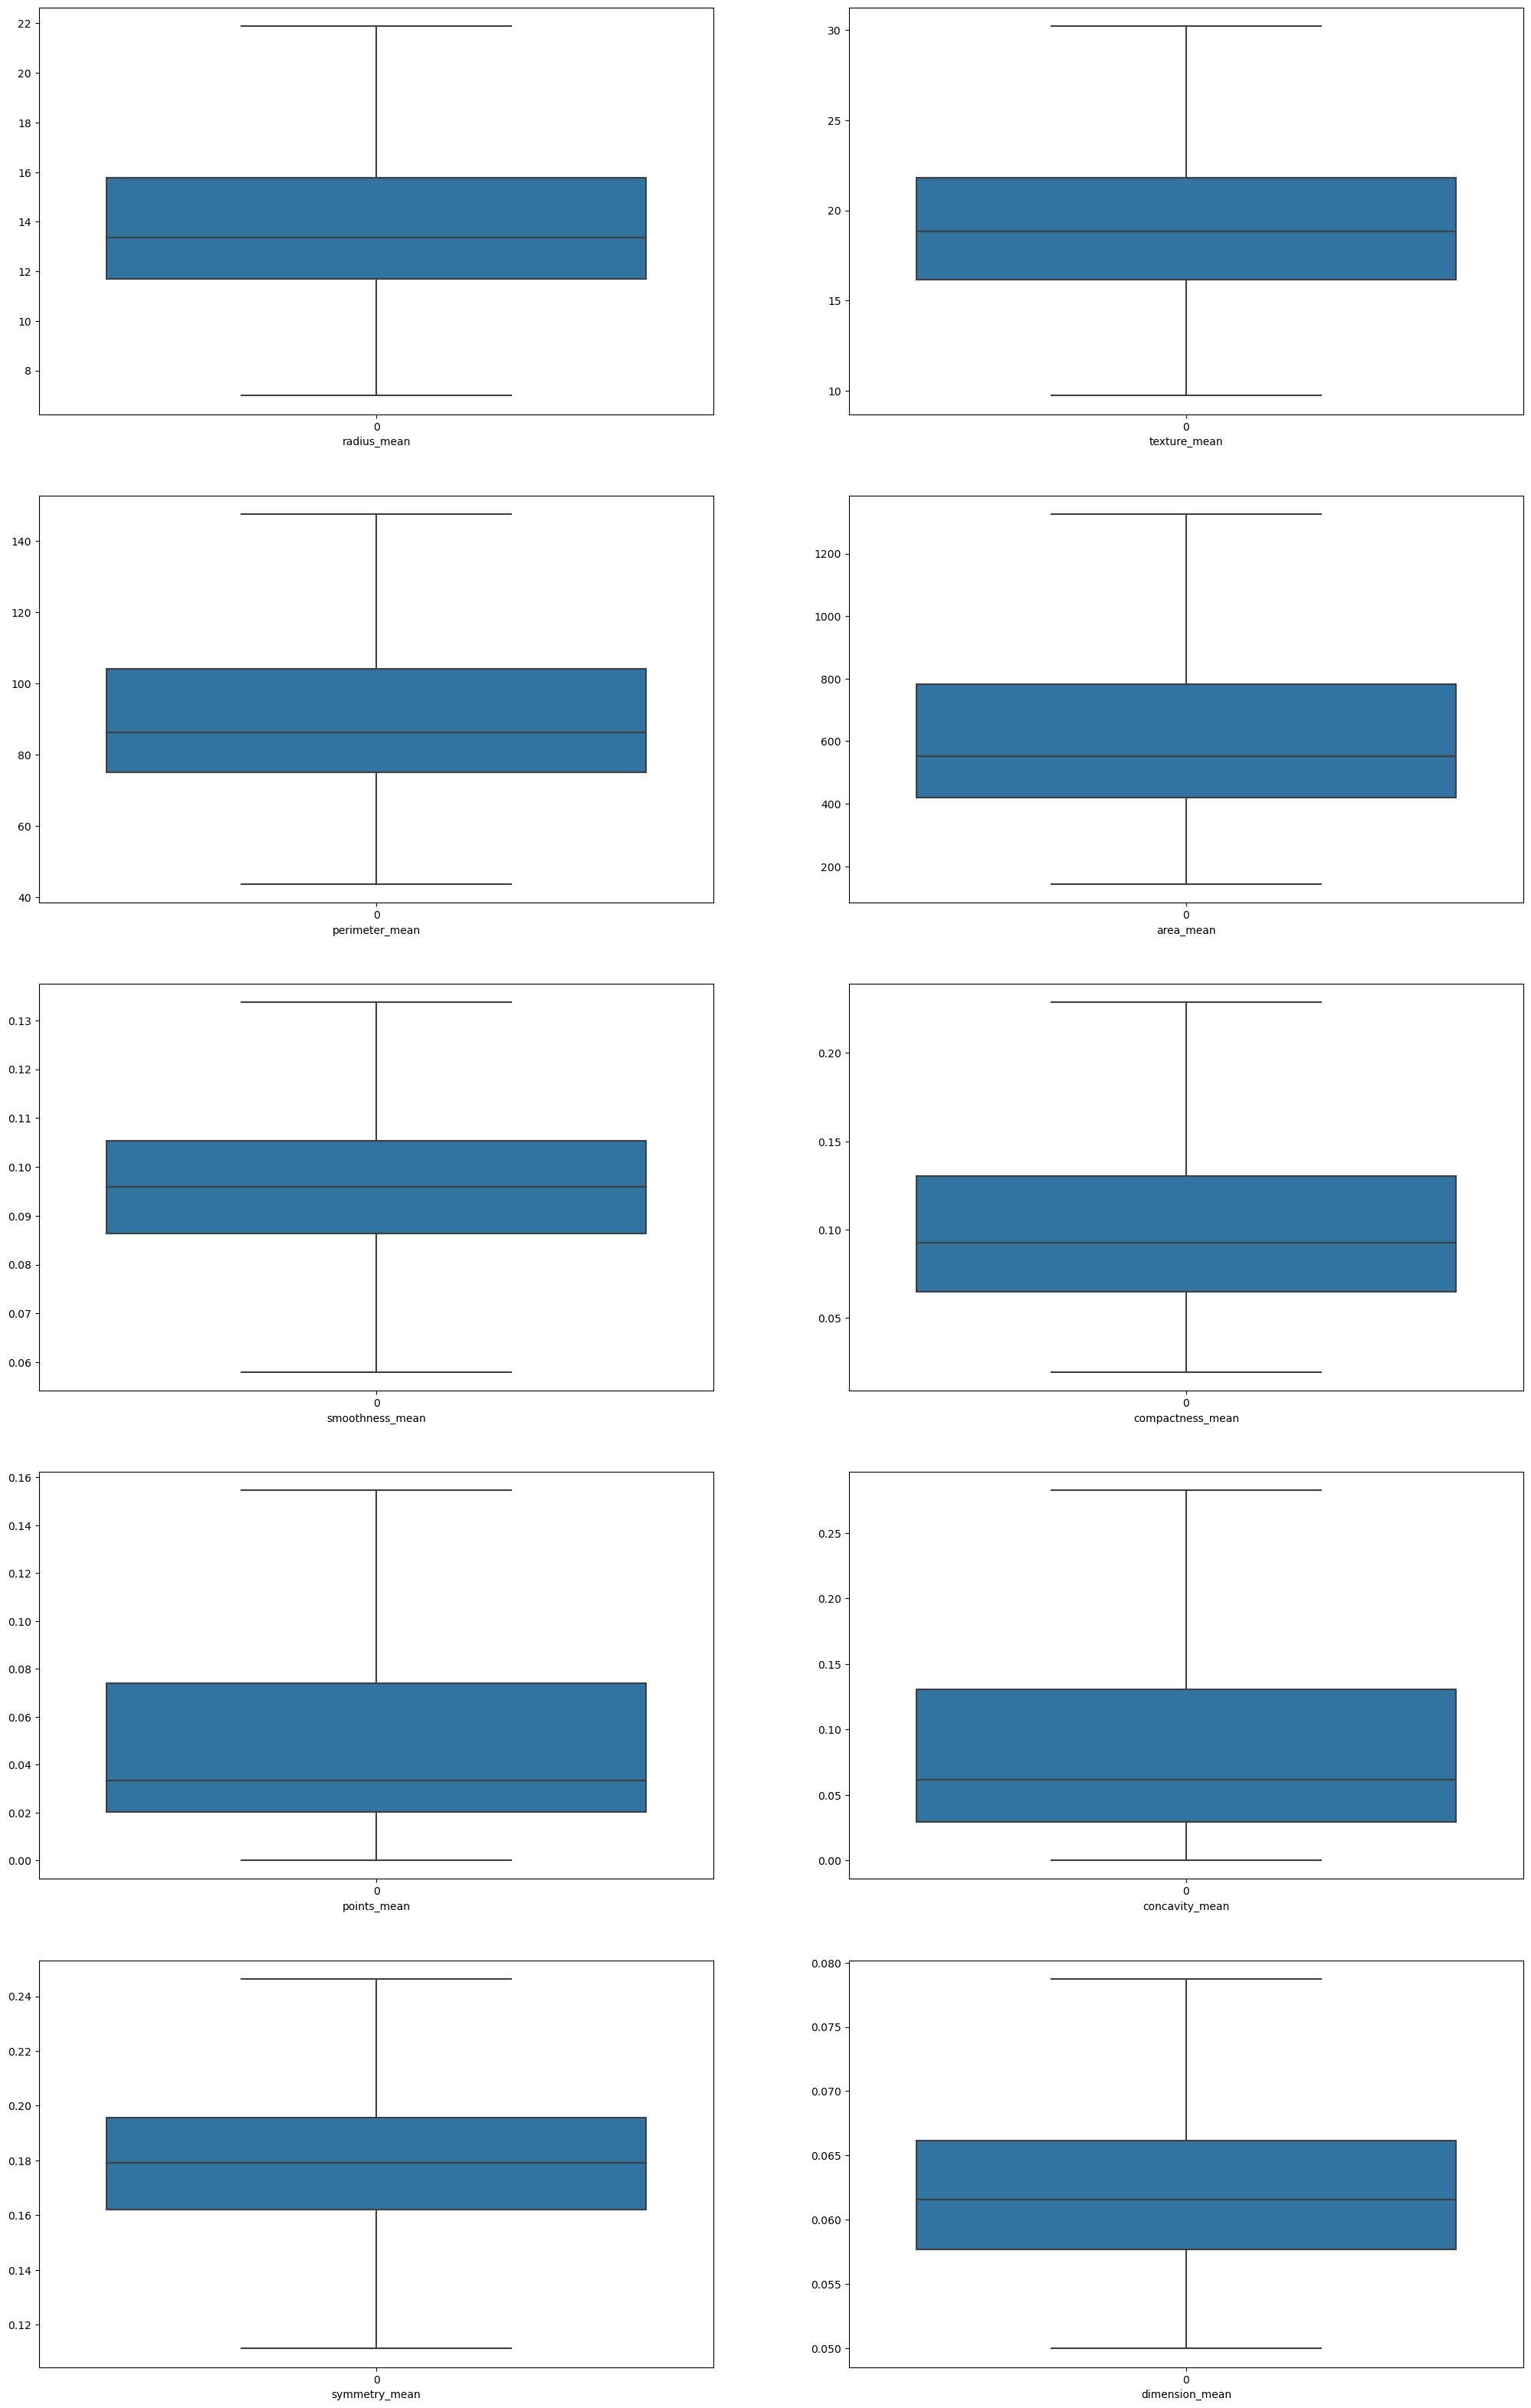

In [54]:
# After outlier removal
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.boxplot(df["radius_mean"])
plt.xlabel("radius_mean")

plt.subplot(5,2,2)
sns.boxplot(df['texture_mean'])
plt.xlabel("texture_mean")

plt.subplot(5,2,3)
sns.boxplot(df['perimeter_mean'])
plt.xlabel("perimeter_mean")

plt.subplot(5,2,4)
sns.boxplot(df['area_mean'])
plt.xlabel("area_mean")

plt.subplot(5,2,5)
sns.boxplot(df['smoothness_mean'])
plt.xlabel("smoothness_mean")

plt.subplot(5,2,6)
sns.boxplot(df['compactness_mean'])
plt.xlabel("compactness_mean")

plt.subplot(5,2,7)
sns.boxplot(df['points_mean'])
plt.xlabel("points_mean")

plt.subplot(5,2,8)
sns.boxplot(df['concavity_mean'])
plt.xlabel("concavity_mean")

plt.subplot(5,2,9)
sns.boxplot(df['symmetry_mean'])
plt.xlabel("symmetry_mean")

plt.subplot(5,2,10)
sns.boxplot(df['dimension_mean'])
plt.xlabel("dimension_mean")

plt.show()

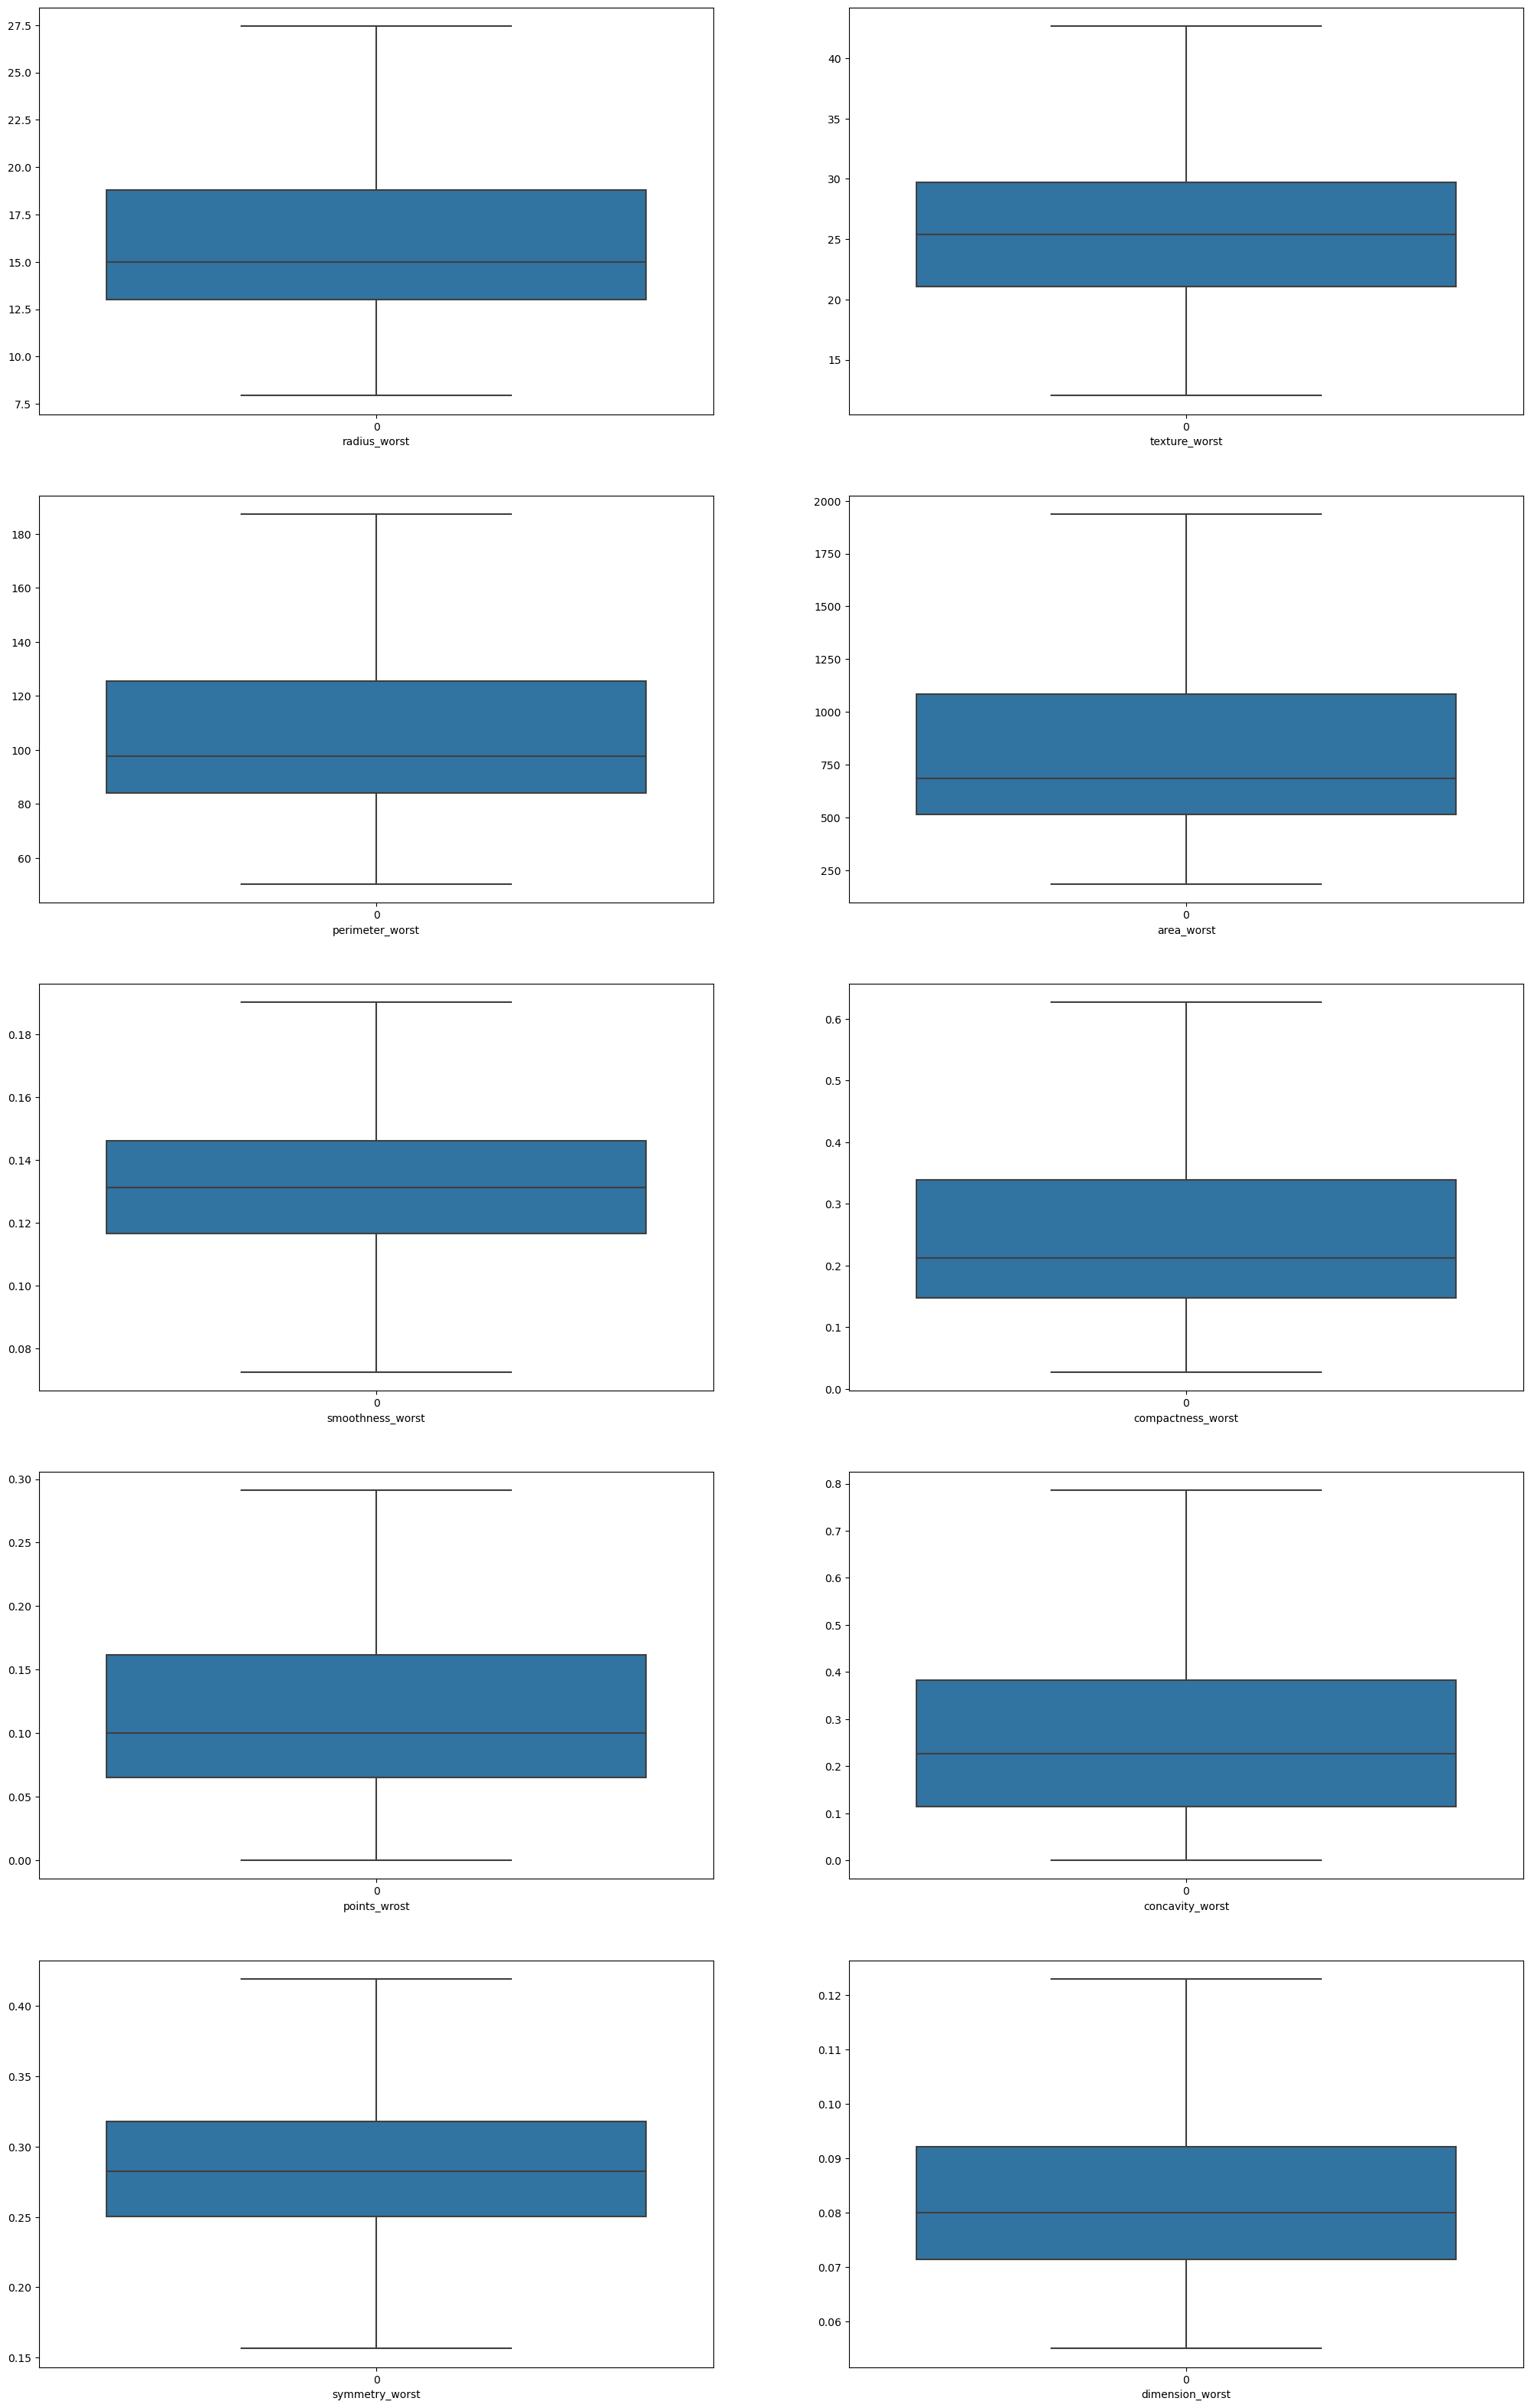

In [55]:
plt.figure(figsize=(25,40))
plt.subplot(5,2,1)
sns.boxplot(df["radius_worst"])
plt.xlabel("radius_worst")

plt.subplot(5,2,2)
sns.boxplot(df['texture_worst'])
plt.xlabel("texture_worst")

plt.subplot(5,2,3)
sns.boxplot(df['perimeter_worst'])
plt.xlabel("perimeter_worst")

plt.subplot(5,2,4)
sns.boxplot(df['area_worst'])
plt.xlabel("area_worst")

plt.subplot(5,2,5)
sns.boxplot(df['smoothness_worst'])
plt.xlabel("smoothness_worst")

plt.subplot(5,2,6)
sns.boxplot(df['compactness_worst'])
plt.xlabel("compactness_worst")

plt.subplot(5,2,7)
sns.boxplot(df['points_worst'])
plt.xlabel("points_wrost")

plt.subplot(5,2,8)
sns.boxplot(df['concavity_worst'])
plt.xlabel("concavity_worst")

plt.subplot(5,2,9)
sns.boxplot(df['symmetry_worst'])
plt.xlabel("symmetry_worst")

plt.subplot(5,2,10)
sns.boxplot(df['dimension_worst'])
plt.xlabel("dimension_worst")

plt.show()

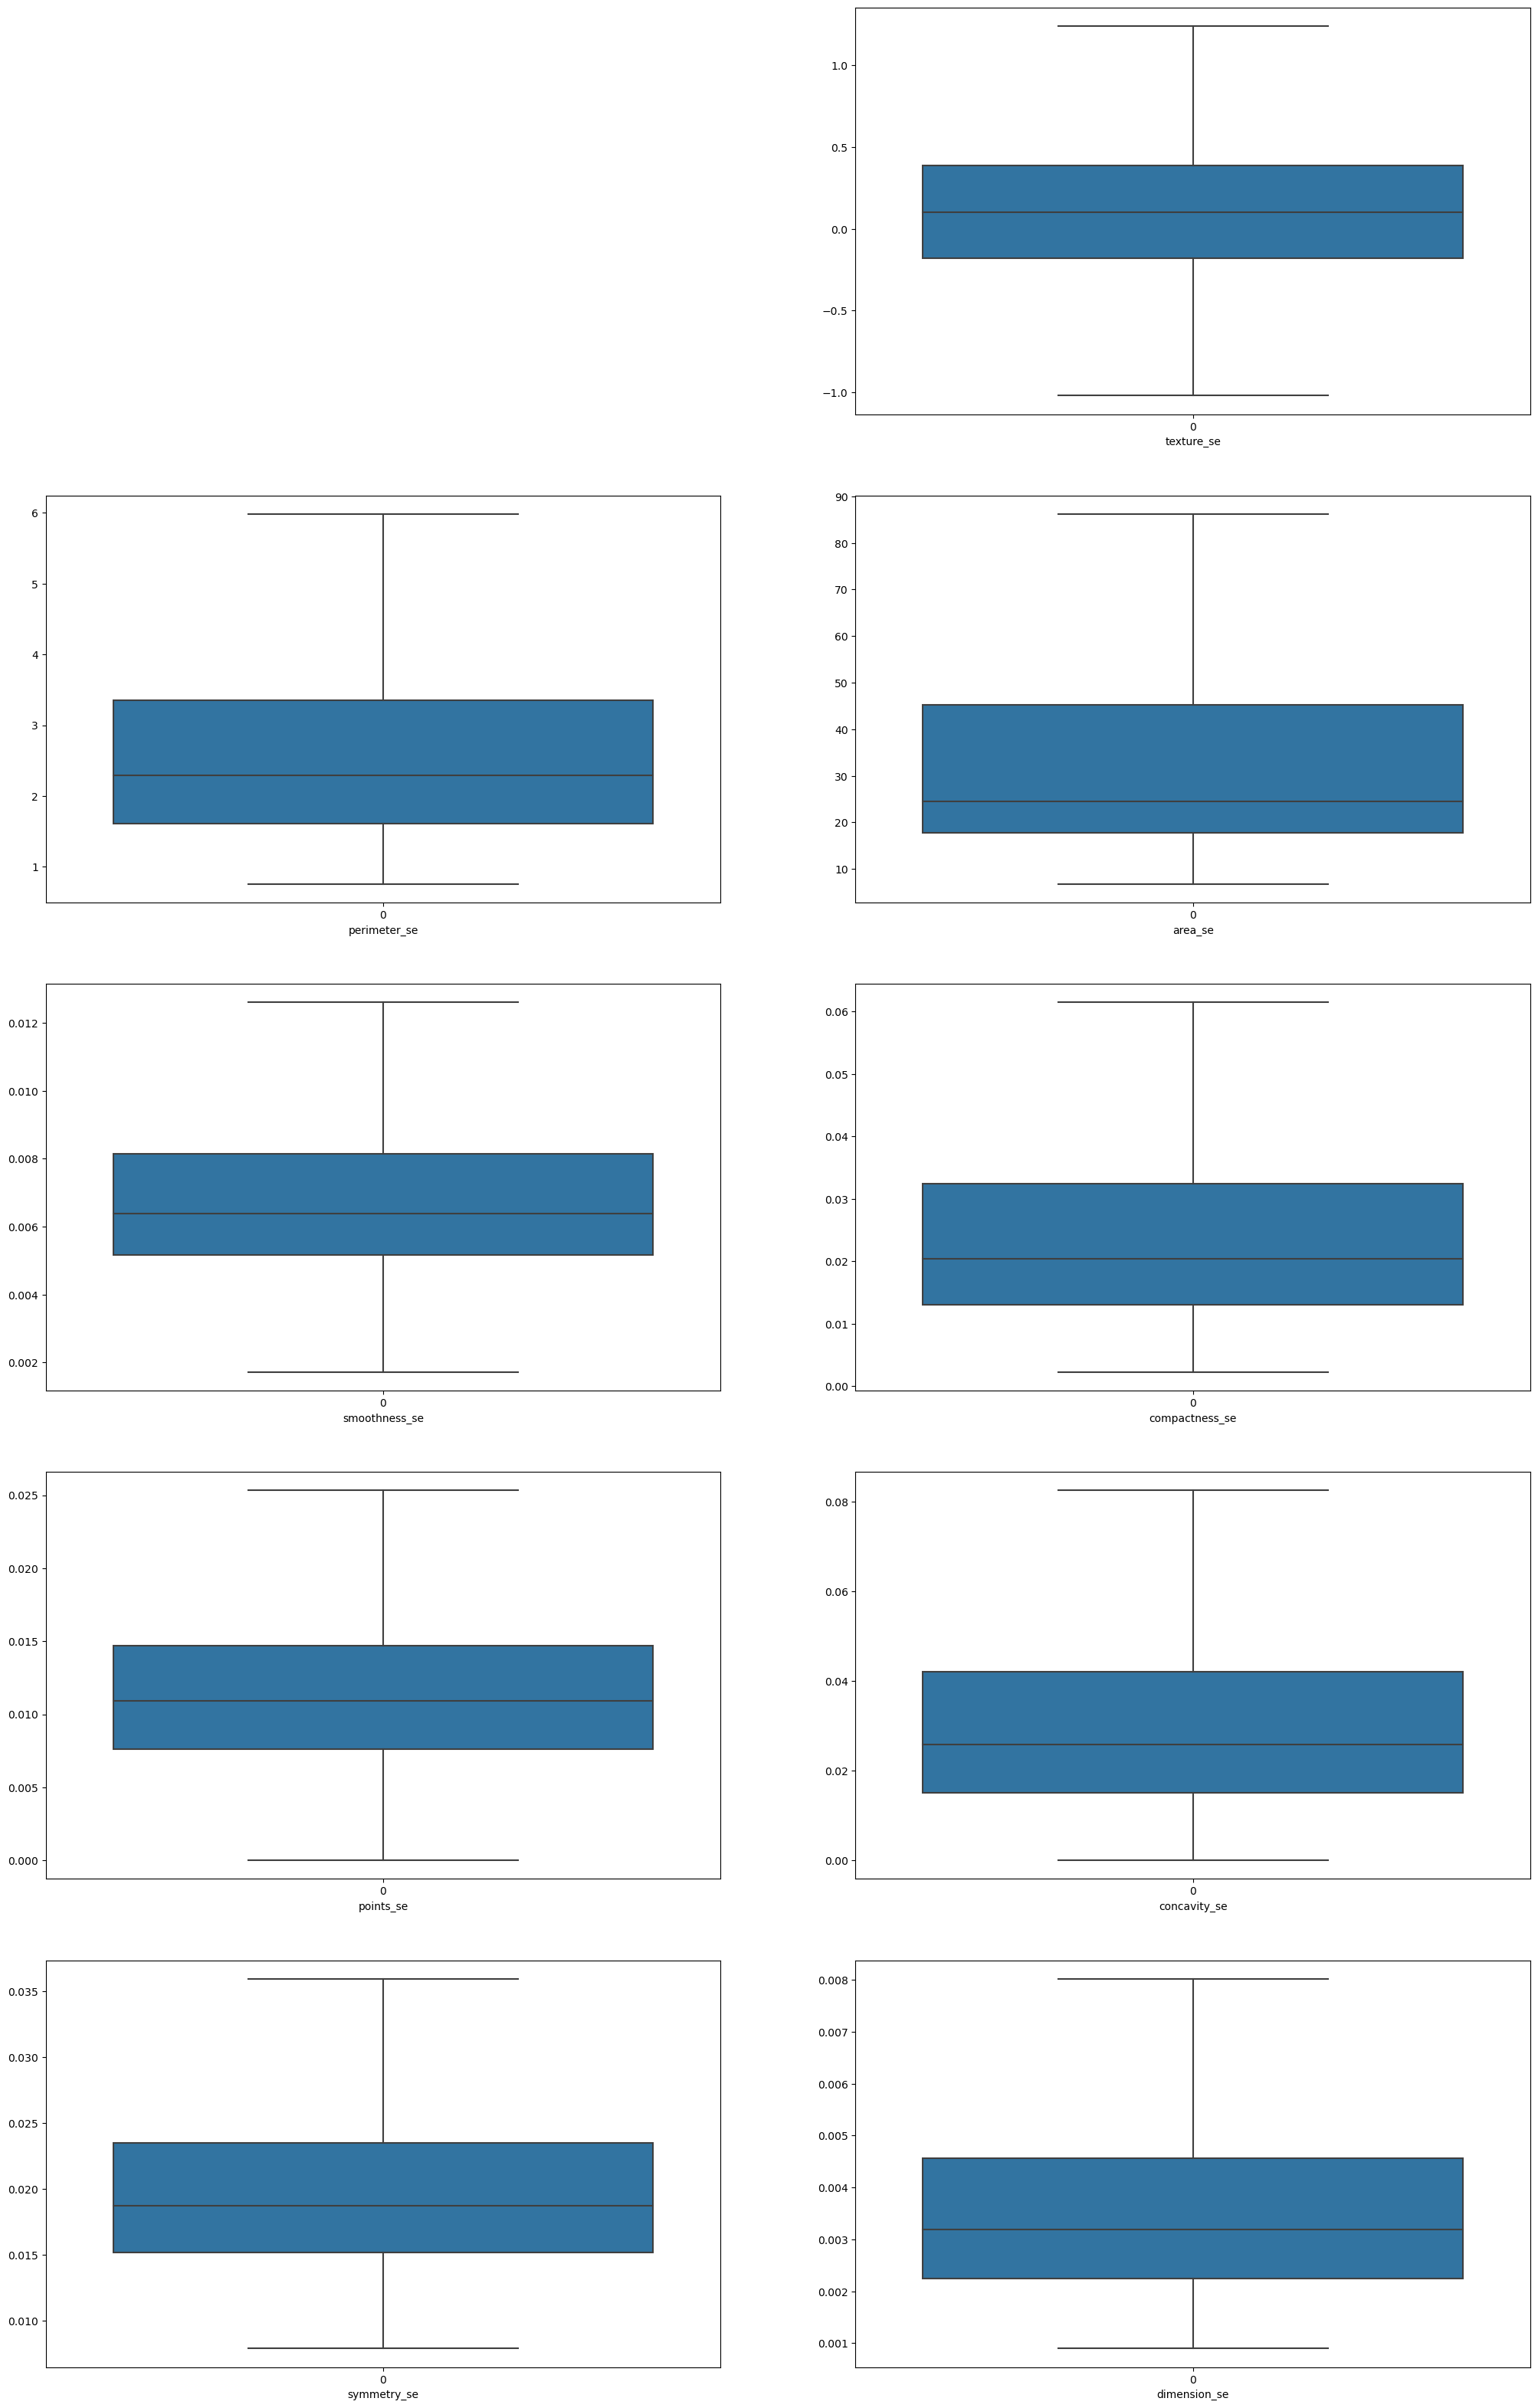

In [57]:
plt.figure(figsize=(25,40))

plt.subplot(5,2,2)
sns.boxplot(df['texture_se'])
plt.xlabel("texture_se")

plt.subplot(5,2,3)
sns.boxplot(df['perimeter_se'])
plt.xlabel("perimeter_se")

plt.subplot(5,2,4)
sns.boxplot(df['area_se'])
plt.xlabel("area_se")

plt.subplot(5,2,5)
sns.boxplot(df['smoothness_se'])
plt.xlabel("smoothness_se")

plt.subplot(5,2,6)
sns.boxplot(df['compactness_se'])
plt.xlabel("compactness_se")

plt.subplot(5,2,7)
sns.boxplot(df['points_se'])
plt.xlabel("points_se")

plt.subplot(5,2,8)
sns.boxplot(df['concavity_se'])
plt.xlabel("concavity_se")

plt.subplot(5,2,9)
sns.boxplot(df['symmetry_se'])
plt.xlabel("symmetry_se")

plt.subplot(5,2,10)
sns.boxplot(df['dimension_se'])
plt.xlabel("dimension_se")

plt.show()

In [58]:
x=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"]

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.52228634, -1.6407784 , -0.55125772, ..., -0.31513306,
        -0.09134145, -0.97829594],
       [-1.03770573, -0.07283672, -0.96685758, ..., -0.53820271,
         0.11861409, -0.46763162],
       [-0.90585426, -0.57954958, -0.89563671, ..., -0.61357437,
         0.22637887, -0.28364227],
       ...,
       [ 0.36471446,  0.75415691,  0.32032947, ...,  0.12171802,
         0.55524728,  0.89977221],
       [ 0.13996764, -1.26074375,  0.10058701, ..., -0.11733956,
        -0.50196246, -0.32807507],
       [ 2.18965869, -0.99304639,  2.16078113, ...,  1.24848623,
        -0.27156877,  0.20762181]])

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,stratify=y,random_state=10)

In [61]:
x_train.shape

(455, 30)

In [62]:
x_test.shape

(114, 30)

In [63]:
y_train.value_counts()

B    285
M    170
Name: diagnosis, dtype: int64

In [64]:
y_test.value_counts()

B    72
M    42
Name: diagnosis, dtype: int64

# Train a model using decision tree and then using bagging

In [65]:
scores = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
scores.mean()
#standalone Decision tree gives 91.03% accurancy for unseen data

0.9103865859338611

## Use bagging now with decision tree

In [66]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.9, 
    oob_score=True,
    random_state=0
)

scores = cross_val_score(bag_model, x, y, cv=5)
scores.mean()

0.9578636857630803

#### You can see that with bagging the score improved from 91.03% to 95.78%